In [1]:
import numpy as np
import anndata as ann
import pandas as pd
import scanpy as sc
import scvelo as scv
import scipy as sp
# import scipy as sci
import matplotlib.pyplot as pl
import matplotlib.pylab as pit
# import math
# import csv
# import loompy
import leidenalg
import bbknn
#pretty plotting
import seaborn as sb
import scrublet as scr

from IPython.core.display import display, HTML
from matplotlib import rcParams

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline
sc.logging.print_versions()
scv.logging.print_version()

-----
anndata     0.7.4
scanpy      1.6.1
sinfo       0.3.1
-----
PIL                 7.2.0
anndata             0.7.4
annoy               NA
appnope             0.1.0
asciitree           NA
backcall            0.2.0
bbknn               NA
bottleneck          1.3.2
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.30.0
dateutil            2.8.1
decorator           4.4.2
fasteners           NA
get_version         2.1
h5py                2.10.0
igraph              0.8.2
importlib_metadata  1.7.0
ipykernel           5.3.2
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.1
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.1
llvmlite            0.33.0+1.g022ab0f
matplotlib          3.2.2
mkl                 2.3.0
mpl_toolkits        NA
msgpack             1.0.0
natsort             7.0.1
n

## Set project file paths

In [3]:
file_path = '/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment'

In [4]:
data_dir = file_path + '/data/'

In [5]:
table_dir = file_path + '/tables/'

In [6]:
sc.settings.figdir = file_path + '/figures/'

## Load the data

#### Load CSC116_Ctrl_9091_fibro_enriched

In [7]:
adata1 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC116_Ctrl_9091_fibro_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata1.var_names_make_unique()
np.shape(adata1)
adata1.obs['batch'] = 'a.9091 ctrl'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC116_Ctrl_9091_immune_enriched

In [8]:
adata2 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC116_Ctrl_9091_immune_enriched/filtered_feature_bc_matrix', var_names='gene_symbols', cache=False) 
adata2.var_names_make_unique()
np.shape(adata2)
adata2.obs['batch'] = 'b.9091 ctrl'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC120_N_T_9091_fibro_enriched

In [9]:
adata3 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC120_N_T_9091_fibro_enriched/filtered_feature_bc_matrix',
                        var_names='gene_symbols', cache=False) 
adata3.var_names_make_unique()
np.shape(adata3)
adata3.obs['batch'] = 'a.9091 T/N'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC120_N_T_9091_immune_enriched

In [10]:
adata4 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC120_N_T_9091_immune_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata4.var_names_make_unique()
np.shape(adata4)
adata4.obs['batch'] = 'b.9091 T/N'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC200_N_T_aPDL1_9091_fibro_enriched

In [11]:
adata5 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/A12-2021_10x/CSC200_B_N_T_aPDL1_9091_fibro_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata5.var_names_make_unique()
np.shape(adata5)
adata5.obs['batch'] = 'a.9091 T/N+aPDL1_1'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC200_N_T_aPDL1_9091_immune_enriched

In [12]:
adata6 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/A12-2021_10x/CSC200_A_N_T_aPDL1_9091_immune/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata6.var_names_make_unique()
np.shape(adata6)
adata6.obs['batch'] = 'b.9091 T/N+aPDL1_1'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC121_N_T_aPDL1_9091_fibro_enriched

In [13]:
adata7 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC121_N_T_aPDL1_9091_fibro_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata7.var_names_make_unique()
np.shape(adata7)
adata7.obs['batch'] = 'a.9091 T/N+aPDL1_2'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC121_N_T_aPDL1_9091_fibro_enriched

In [14]:
adata8 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC121_N_T_aPDL1_9091_immune_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata8.var_names_make_unique()
np.shape(adata8)
adata8.obs['batch'] = 'b.9091 T/N+aPDL1_2'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC123_Ctrl_8661_fibro_enriched

In [15]:
adata9 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC123_Ctrl_8661_fibro_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata9.var_names_make_unique()
np.shape(adata9)
adata9.obs['batch'] = 'a.8661 ctrl'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC123_Ctrl_8661_immune_enriched

In [16]:
adata10 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC123_Ctrl_8661_immune_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata10.var_names_make_unique()
np.shape(adata10)
adata10.obs['batch'] = 'b.8661 ctrl'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC130_CSC127_N_T_8661_fibro_enriched

In [17]:
adata11 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC130_CSC127_N_T_8661_fibro_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata11.var_names_make_unique()
np.shape(adata11)
adata11.obs['batch'] = 'a.8661 T/N'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC130_CSC127_N_T_8661_immune_enriched

In [18]:
adata12 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC130_CSC127_N_T_8661_immune_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata12.var_names_make_unique()
np.shape(adata12)
adata12.obs['batch'] = 'b.8661 T/N'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC128_N_T_aPDL1_8661_fibro_enriched

In [19]:
adata13 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC128_N_T_aPDL1_8661_fibro_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata13.var_names_make_unique()
np.shape(adata13)
adata13.obs['batch'] = 'a.8661 T/N+aPDL1'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


#### Load CSC128_N_T_aPDL1_8661_immune_enriched

In [20]:
adata14 = sc.read_10x_mtx('/Users/stefanie_baerthel/scRNA-seq/scRNAseq_analysis/Treatment/Treatment/CSC128_N_T_aPDL1_8661_immune_enriched/filtered_feature_bc_matrix', 
                        var_names='gene_symbols', cache=False) 
adata14.var_names_make_unique()
np.shape(adata14)
adata14.obs['batch'] = 'b.8661 T/N+aPDL1'

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


Combine all samples

In [21]:
adata = adata1.concatenate([adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11, adata12, adata13, adata14], batch_key='batch_key')

In [22]:
np.shape(adata)

(43271, 29836)

In [23]:
adata

AnnData object with n_obs × n_vars = 43271 × 29836
    obs: 'batch', 'batch_key'
    var: 'feature_types', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9'

## Quality control

In [24]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(axis = 1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(axis = 1)

mt_gene_mask = np.flatnonzero([gene.startswith('mt-') for gene in adata.var_names])
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['mt_frac'] = np.sum(adata[:, mt_gene_mask].X, axis=1).A1/adata.obs['n_counts']

... storing 'batch' as categorical
... storing 'feature_types' as categorical


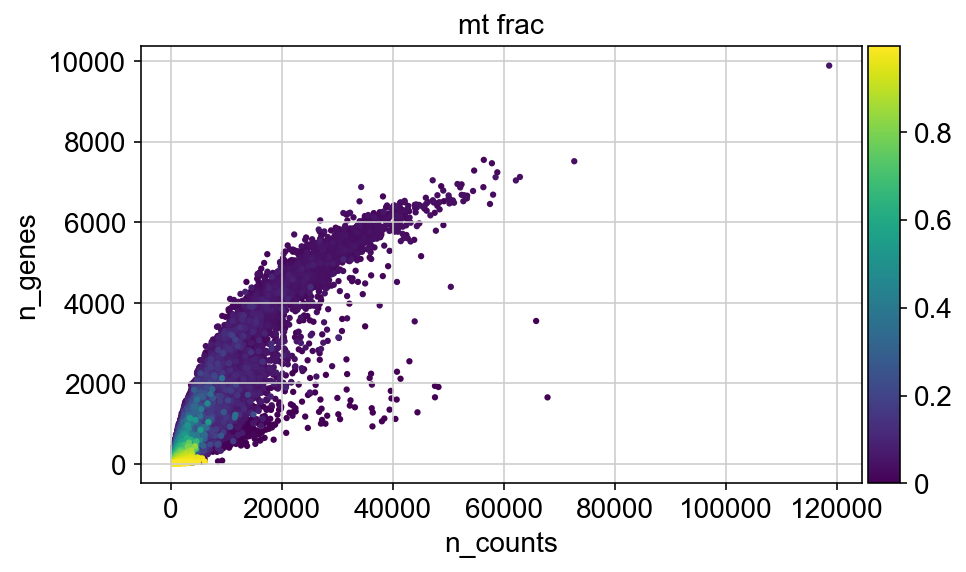

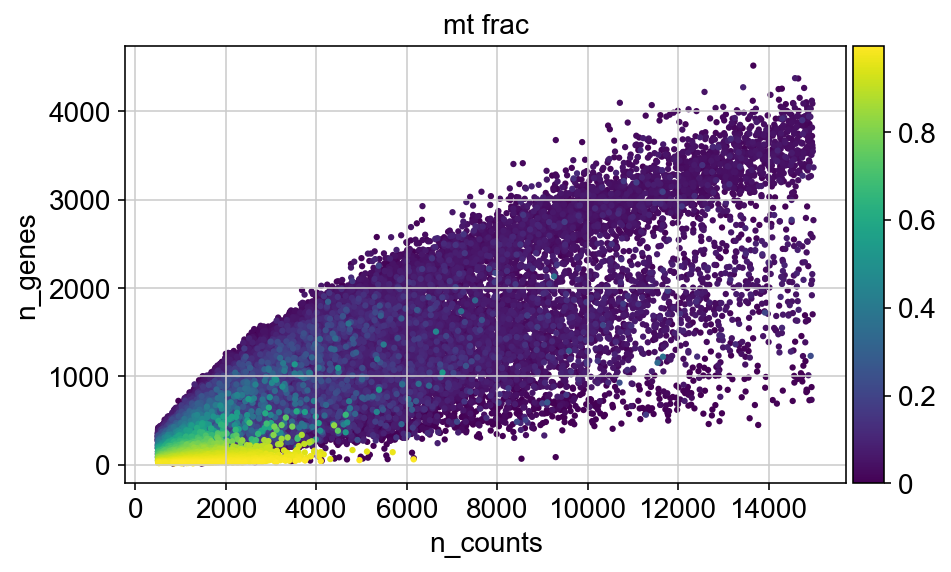

In [25]:
#Data quality summary plots
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='mt_frac', size=40)
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<15000], 'n_counts', 'n_genes', 
                   color='mt_frac', size=40)

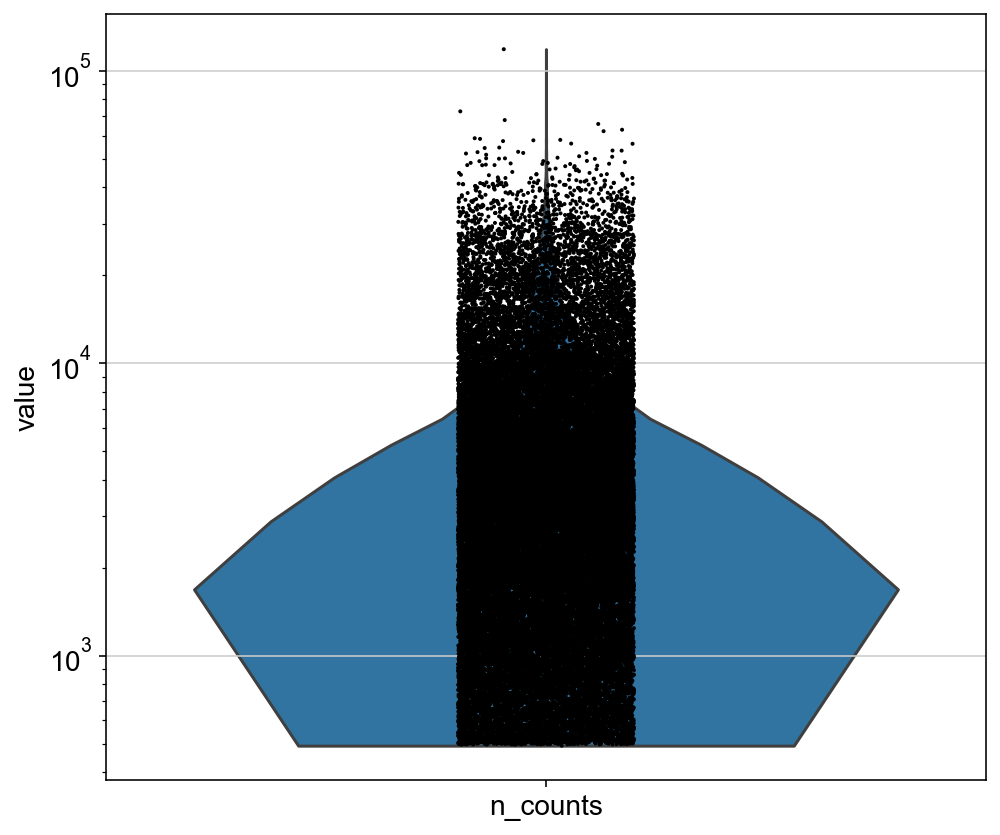

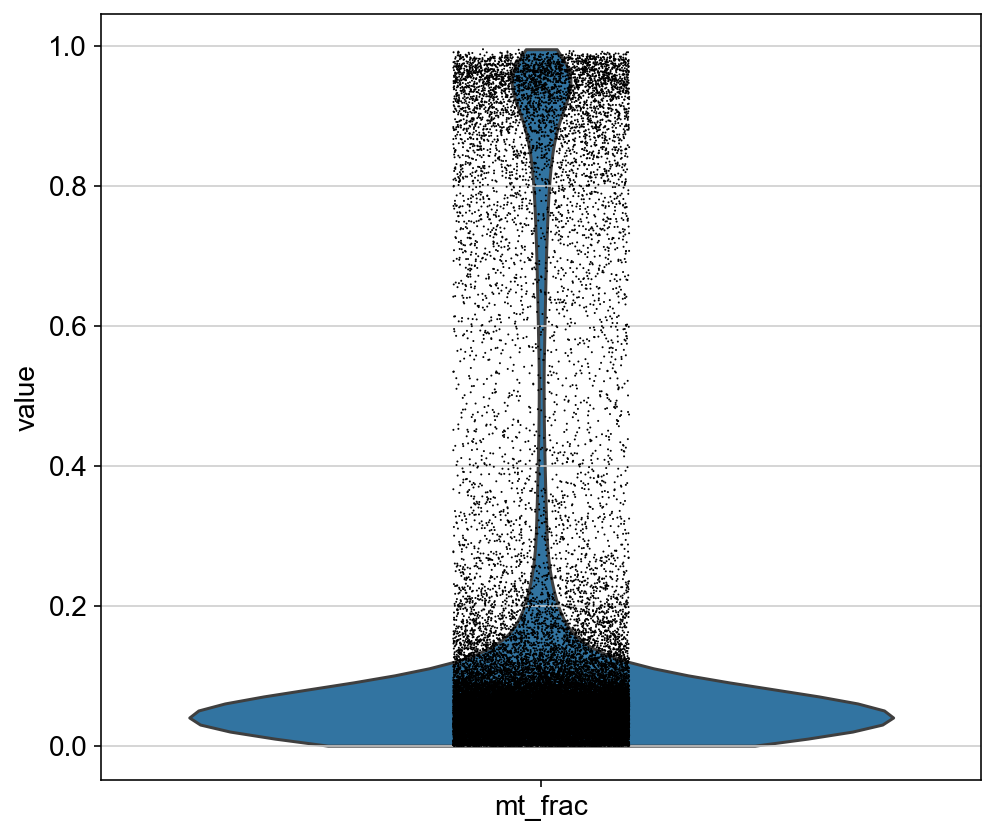

In [26]:
#Sample quality plots
rcParams['figure.figsize']=(7,7)
t1 = sc.pl.violin(adata, 'n_counts',
                  #groupby='sample',
                  size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'mt_frac')

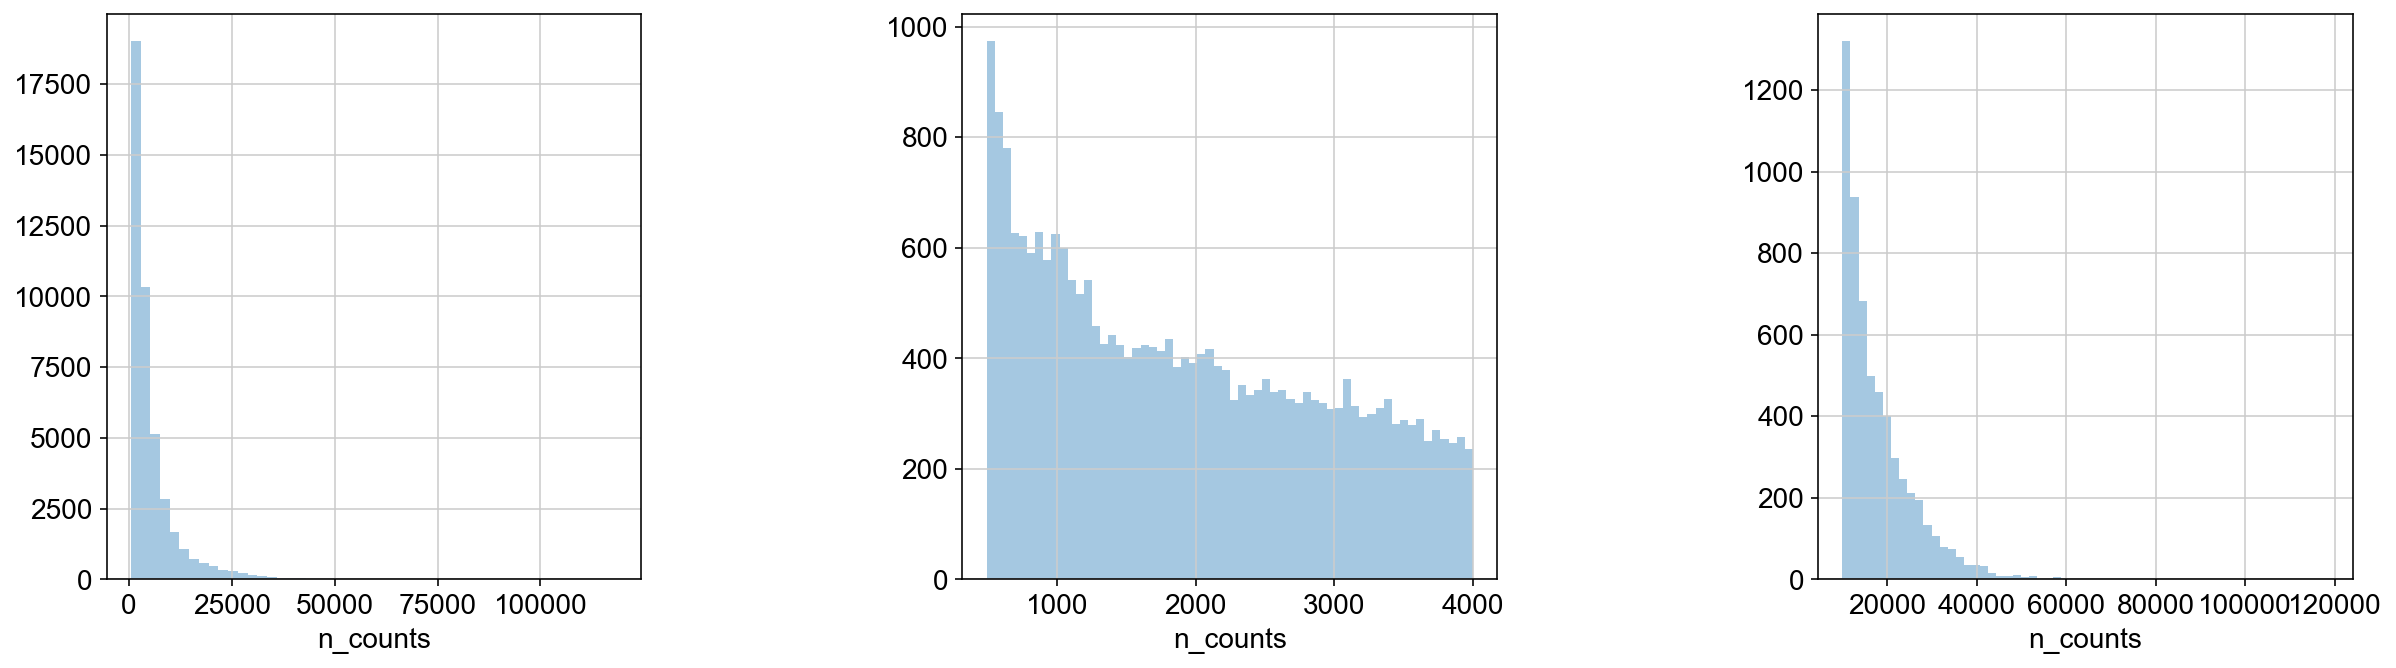

In [27]:
#Thresholding decision: counts
rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 134)
fig = pl.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p3 = sb.distplot(adata.obs['n_counts'], 
                 kde=False, 
                 ax=fig.add_subplot(fig_ind[0]))
p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<4000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[1]))
p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[2]))
pl.show()

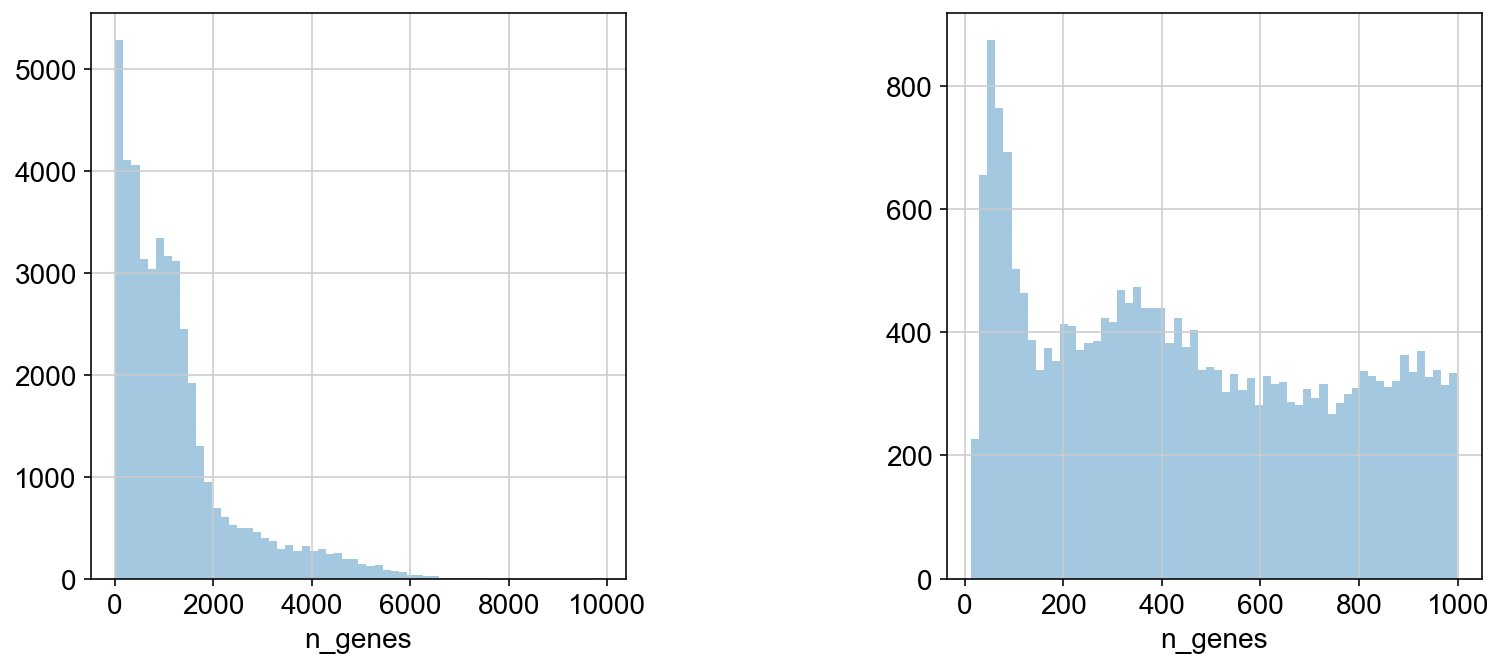

In [28]:
#Thresholding decision: genes

rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 133)
fig = pl.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6) #create a grid for subplots

p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60, ax=fig.add_subplot(fig_ind[0]))

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<1000], 
                 kde=False, bins=60, ax=fig.add_subplot(fig_ind[1]))
pl.show()

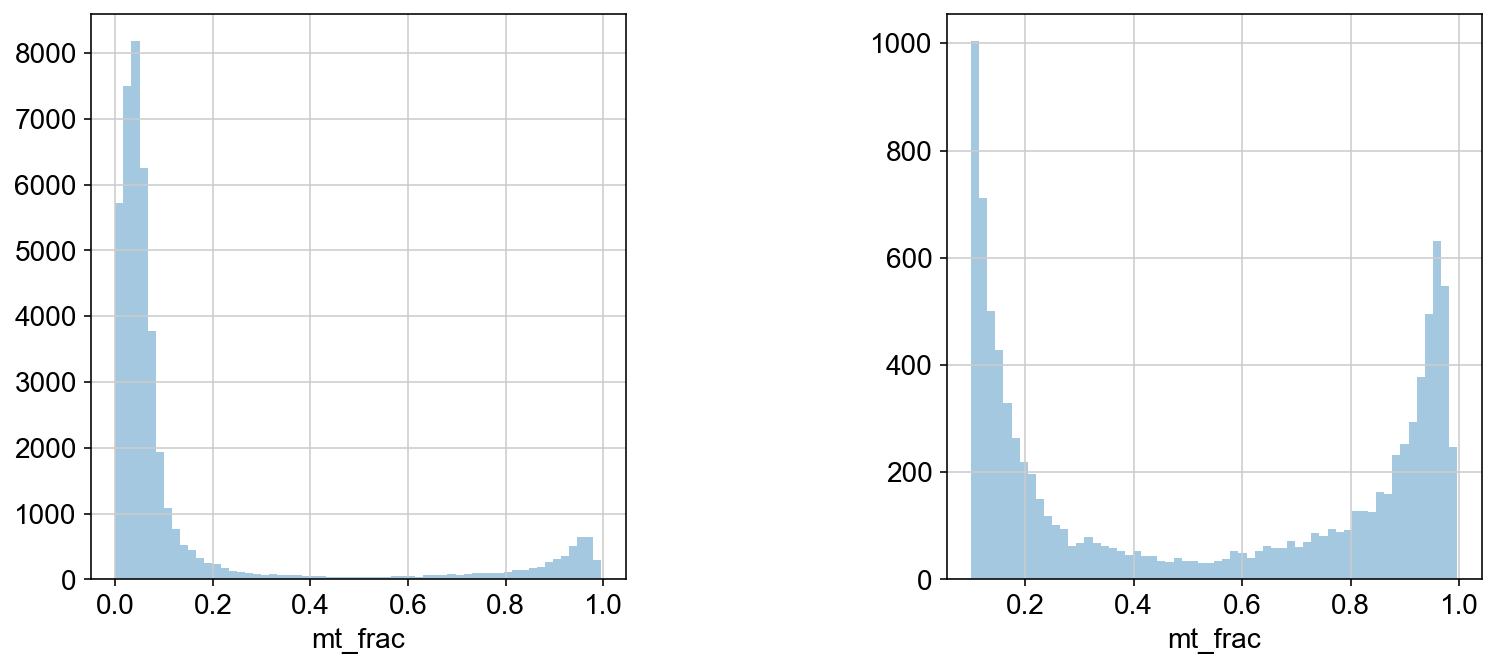

In [29]:
#Thresholding decision: mitochondrial reads

rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 133)
fig = pl.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p8 = sb.distplot(adata.obs['mt_frac'], kde=False, bins=60, ax=fig.add_subplot(fig_ind[0]))

p9 = sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac']>0.1], 
                 kde=False, bins=60, ax=fig.add_subplot(fig_ind[1]))
pl.show()

In [30]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

#sc.pp.filter_cells(adata, min_counts = 1000)
#print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 20000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.1]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 200)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

Total number of cells: 43271
filtered out 1765 cells that have more than 20000 counts
Number of cells after max count filter: 41506
Number of cells after MT filter: 31644
filtered out 967 cells that have less than 200 genes expressed


Trying to set attribute `.obs` of view, copying.


Number of cells after gene filter: 30677


## Normalization

In [31]:
adata_aux = sc.pp.filter_genes(adata, min_counts=20, copy=True) 
adata_aux.layers["counts"] = adata_aux.X.copy()
sc.pp.normalize_per_cell(adata_aux) 
# Per-cell normalize the data matrix X. Reccomendation: Use this matrix for diff gene Expression analysis and visualisation! 
# Set total counts to be equal for all cells!
sc.pp.log1p(adata_aux)

filtered out 14067 genes that are detected in less than 20 counts
normalizing by total count per cell
    finished (0:00:01): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [32]:
adata_aux.layers["counts"]

<30677x15769 sparse matrix of type '<class 'numpy.float32'>'
	with 41067723 stored elements in Compressed Sparse Row format>

In [33]:
sc.tl.pca(adata_aux, svd_solver='arpack')

computing PCA
    with n_comps=50
    finished (0:00:14)


In [34]:
sc.pp.neighbors(adata_aux, n_pcs=30, n_neighbors=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)


In [35]:
sc.tl.leiden(adata_aux, resolution=1.5)

running Leiden clustering
    finished: found 31 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:39)


In [36]:
sc.tl.umap(adata_aux, min_dist=0.5, random_state=0)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:23)


In [37]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

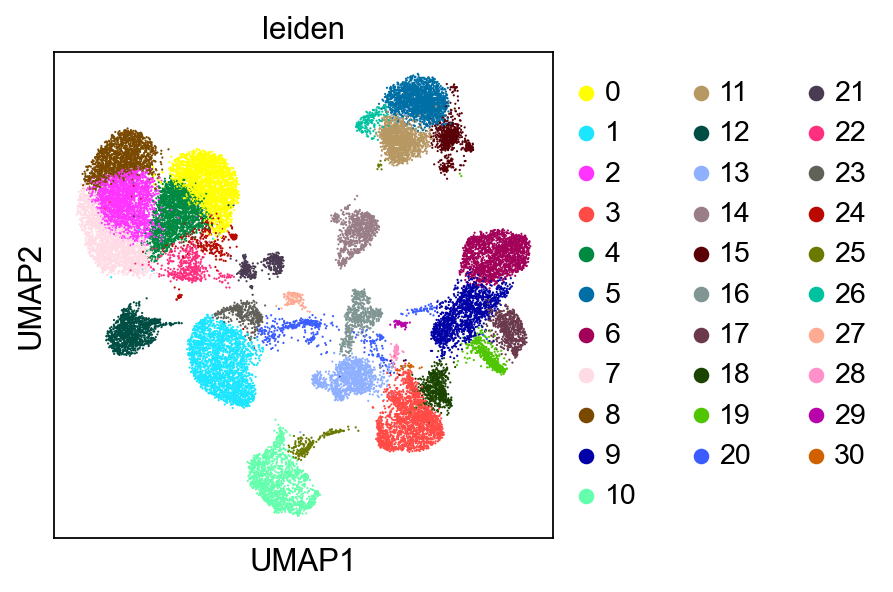

In [38]:
sc.pl.umap(adata_aux, color=['leiden'], wspace=0.1)

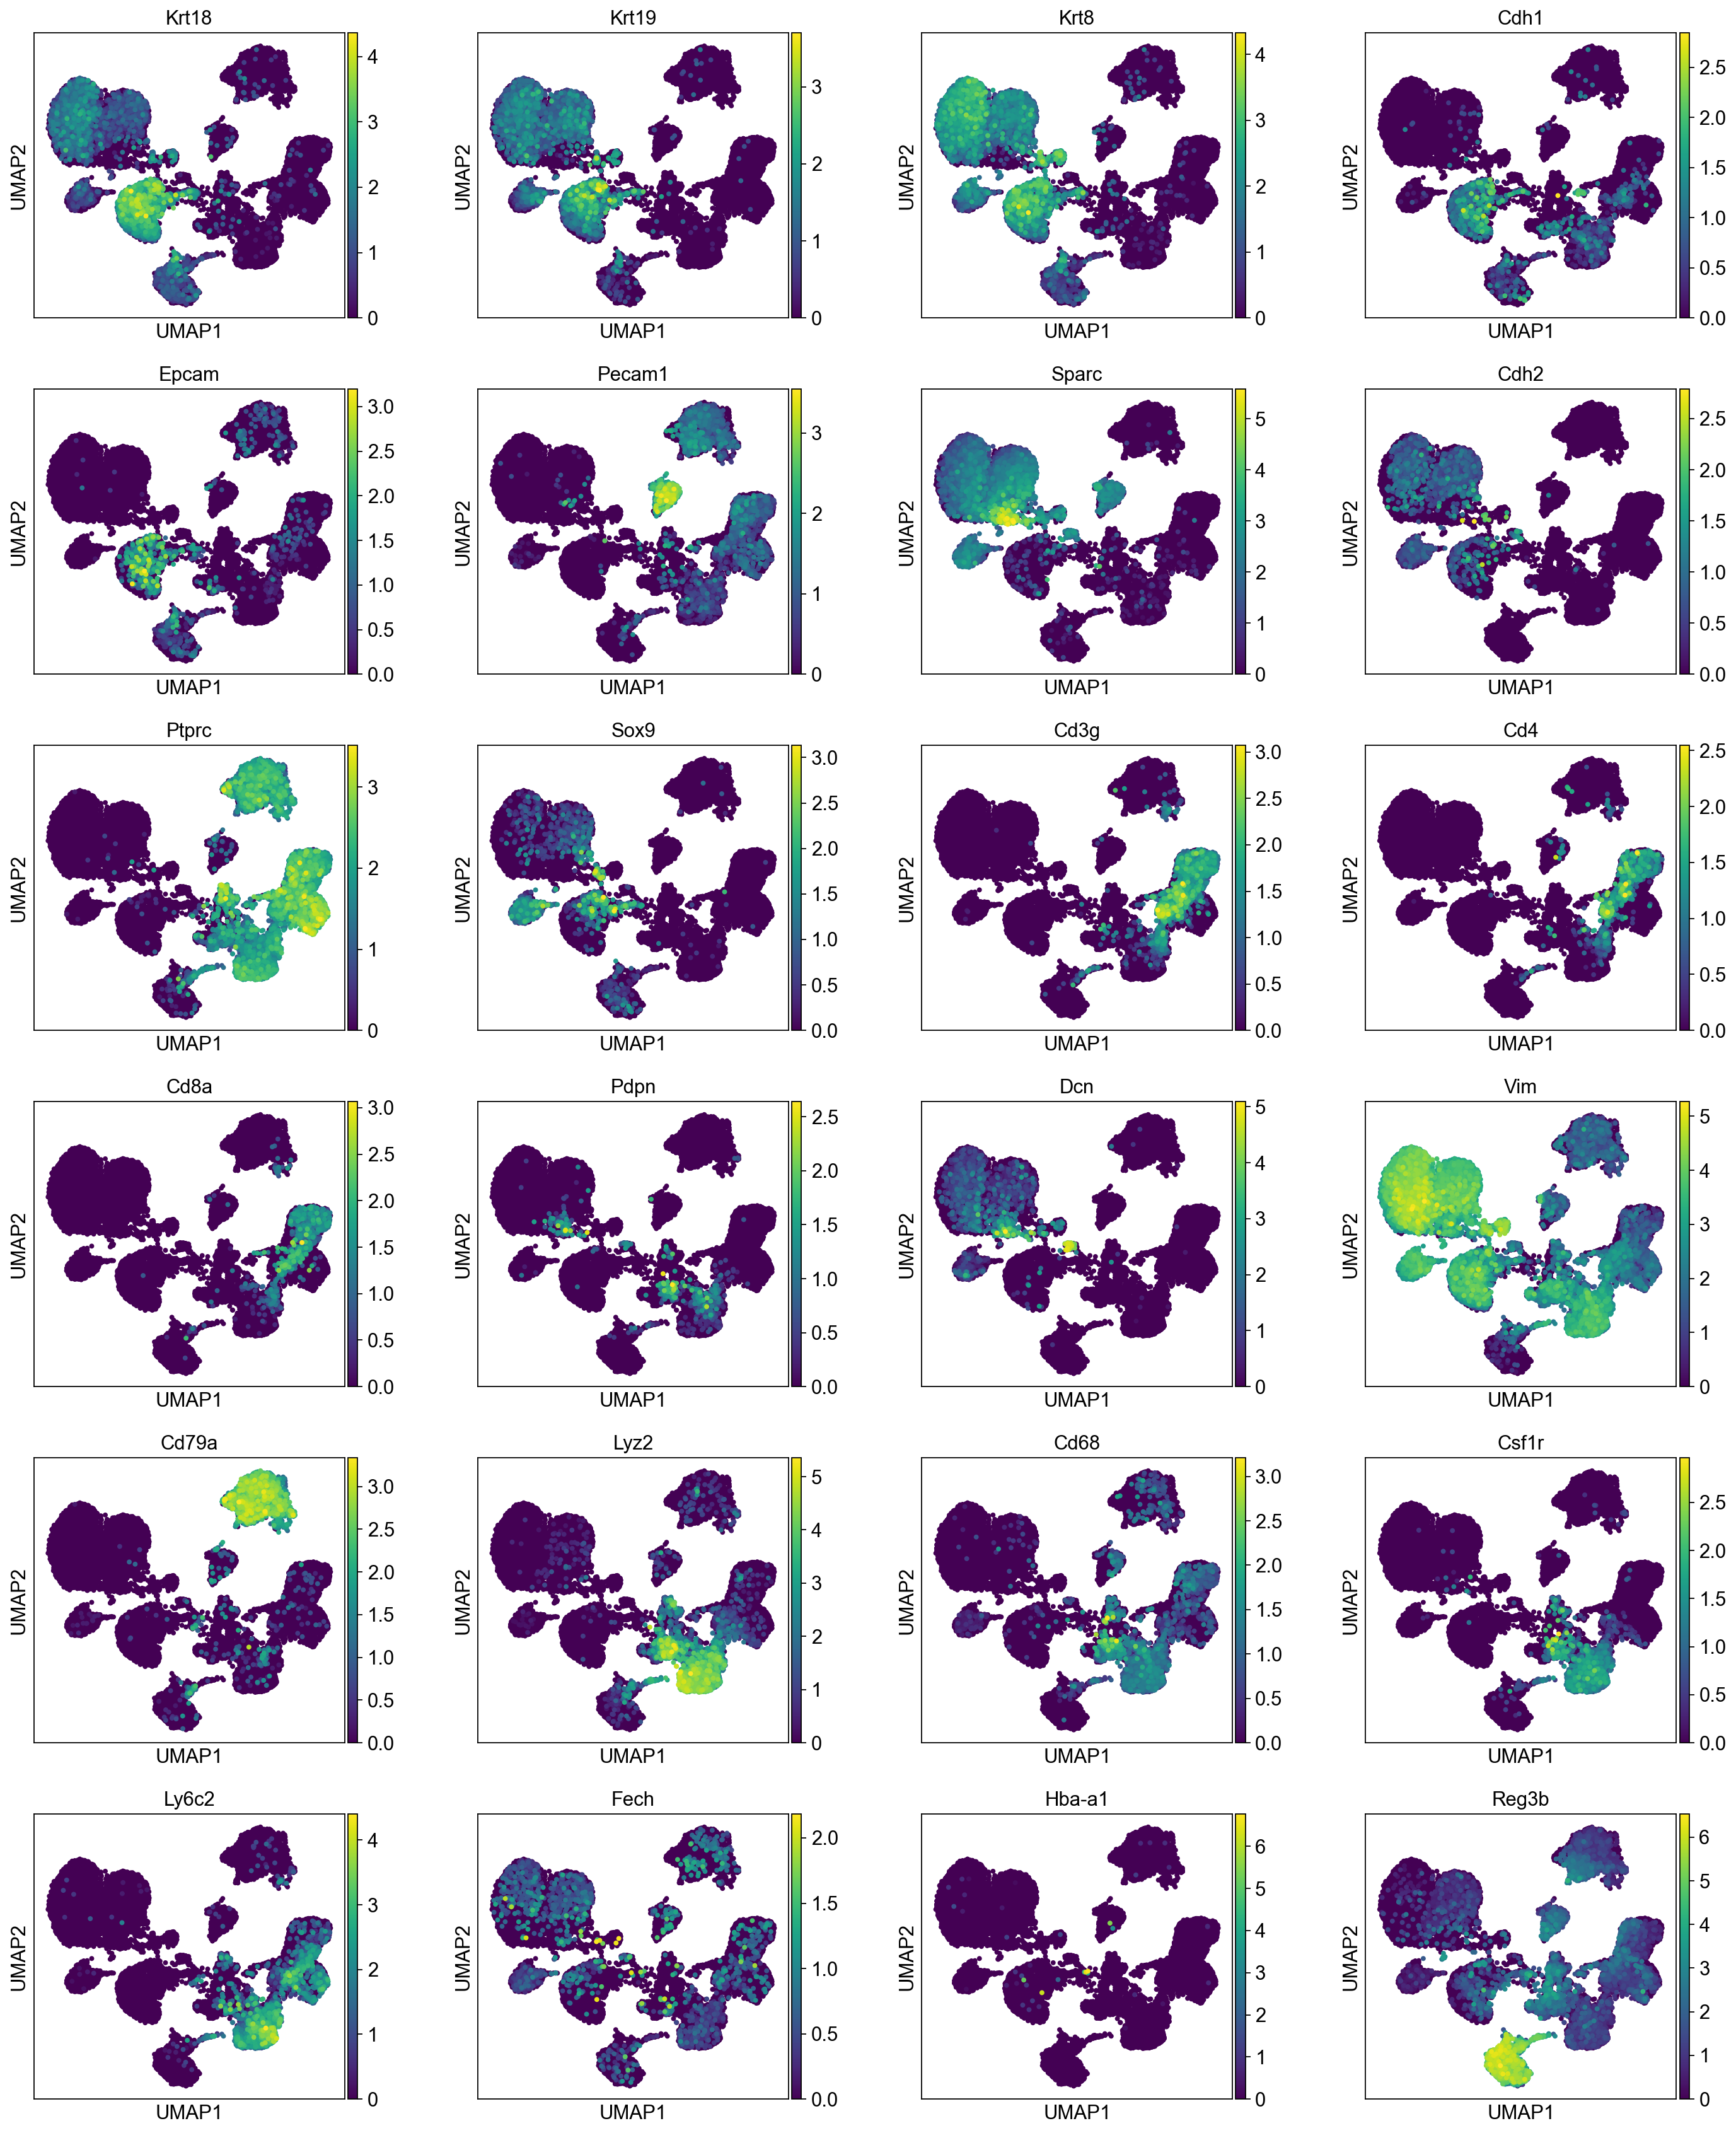

In [39]:
sc.pl.umap(adata_aux, projection='2d', color=['Krt18', 'Krt19','Krt8','Cdh1','Epcam','Pecam1','Sparc','Cdh2',
                                              'Ptprc','Sox9','Cd3g','Cd4','Cd8a','Pdpn','Dcn','Vim','Cd79a','Lyz2', 'Cd68','Csf1r','Ly6c2','Fech','Hba-a1','Reg3b'],size=50, 
           wspace=0.3) 

In [40]:
use_cells = adata_aux.obs.index[(adata_aux.obs['leiden'].isin(['22','27']))]

Trying to set attribute `.uns` of view, copying.


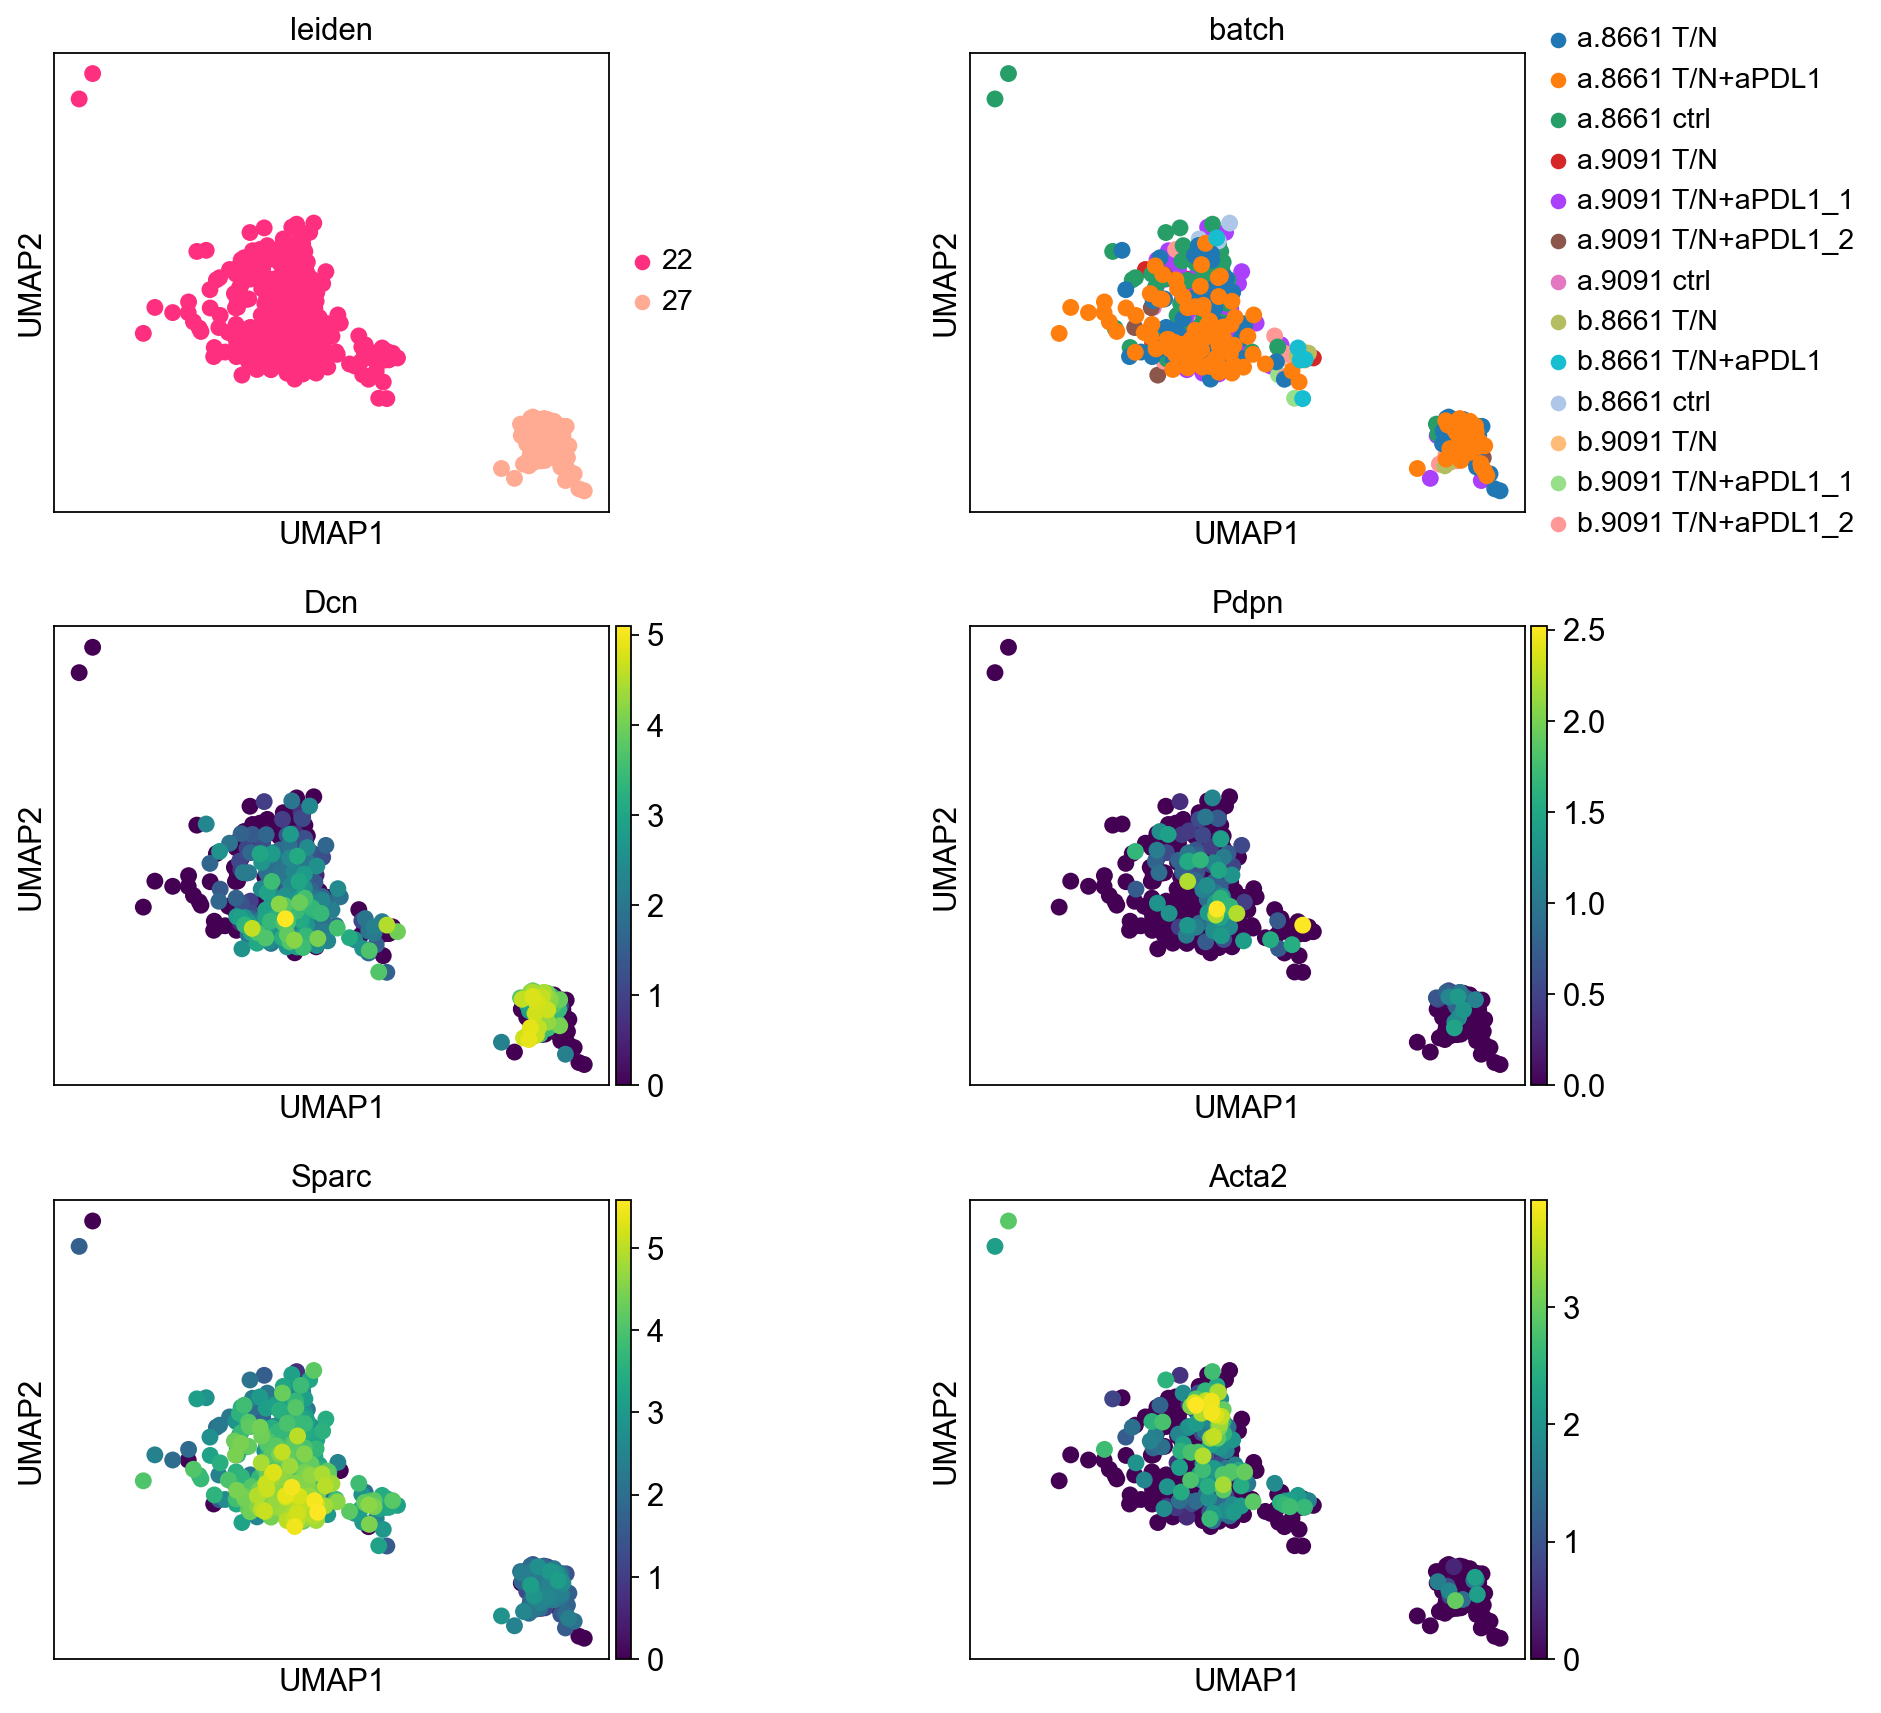

In [41]:
sc.pl.umap(adata_aux[use_cells,:], color=['leiden','batch','Dcn','Pdpn','Sparc','Acta2'], ncols=2, wspace=0.5)

In [42]:
adata = adata[use_cells,:].copy()
np.shape(adata)

(519, 29836)

In [43]:
np.shape(adata)

(519, 29836)

In [44]:
## to test if matrix has already been normalized or log
adata.X[1:50,1:50].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [45]:
adata

AnnData object with n_obs × n_vars = 519 × 29836
    obs: 'batch', 'batch_key', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'feature_types', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9'

## Cell Cycle Classification

Use scaled dummy object for Seurat-like cell cycle analysis and perform regression on this object.

In [46]:
adata_aux2 = sc.pp.filter_genes(adata, min_cells=3, copy=True)

filtered out 18882 genes that are detected in less than 3 cells


In [47]:
sc.pp.normalize_per_cell(adata_aux2)
scv.pp.log1p(adata_aux2)
sc.pp.scale(adata_aux2) 

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [48]:
sc.tl.pca(adata_aux2) 

computing PCA
    with n_comps=50
    finished (0:00:00)


In [49]:
cell_cycle_genes = [x.strip() for x in open('/Users/stefanie_baerthel/scRNA-seq/10xRun5/data/regev_lab_cell_cycle_genes.txt')]

In [50]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata_aux2.var_names]

In [51]:
sc.tl.score_genes_cell_cycle(adata_aux2, s_genes=s_genes, g2m_genes=g2m_genes)
adata_aux2_cc_genes = adata_aux2[:, cell_cycle_genes]

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    816 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    859 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


In [52]:
sc.tl.pca(adata_aux2_cc_genes, svd_solver='arpack') # perform pca in feature space spanned by cell cycle genes

computing PCA
    with n_comps=50
    finished (0:00:00)


... storing 'phase' as categorical


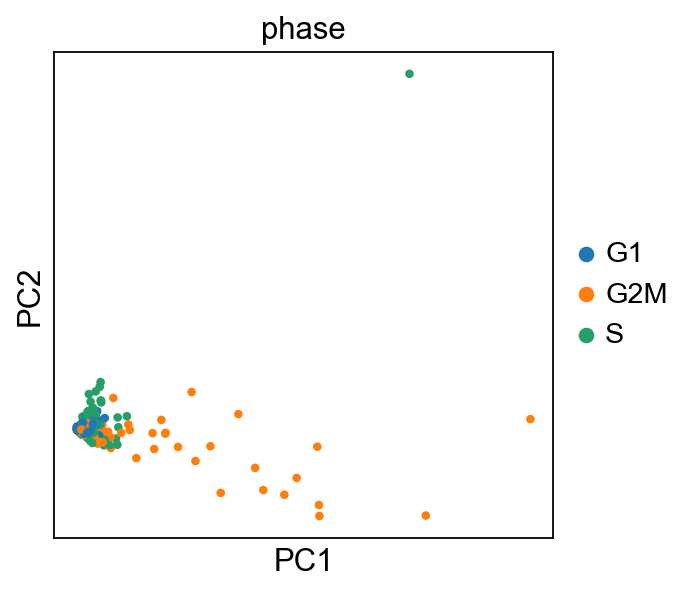

In [53]:
sc.pl.pca_scatter(adata_aux2_cc_genes, color=['phase'], legend_fontsize=13, size=60, wspace=0.3)

In [54]:
sc.pp.neighbors(adata_aux2_cc_genes, n_neighbors=20, n_pcs=5)
#scv.pp.moments(adata_aux2_cc_genes, n_pcs=10, n_neighbors=30) 

computing neighbors
    using 'X_pca' with n_pcs = 5
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


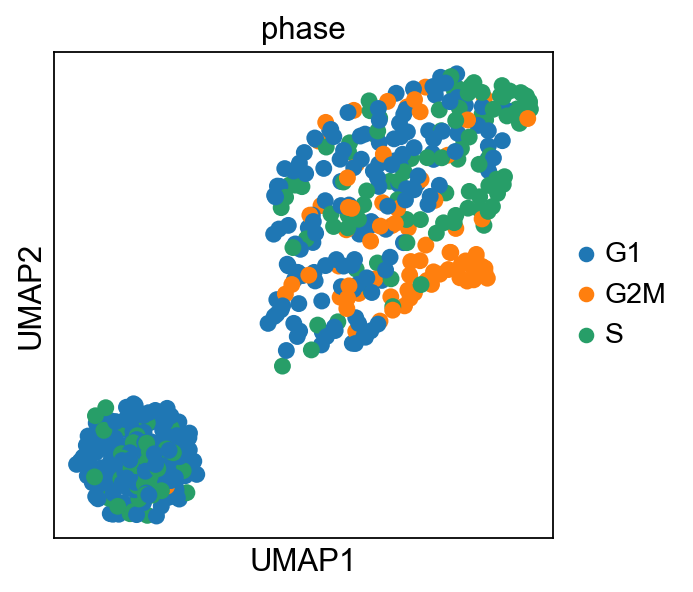

In [55]:
sc.tl.umap(adata_aux2_cc_genes) 
sc.pl.umap(adata_aux2_cc_genes, color=['phase'])

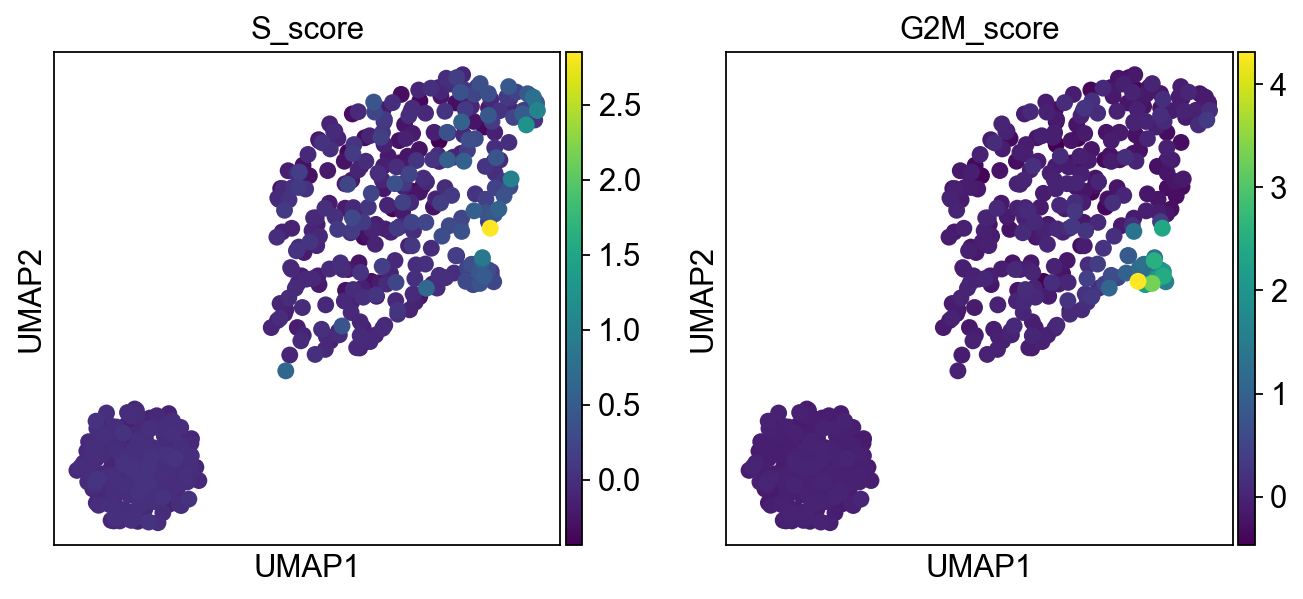

In [56]:
sc.pl.umap(adata_aux2_cc_genes, color=['S_score','G2M_score'])

In [57]:
adata.obs['phase'] = adata_aux2.obs['phase']
adata.obs['S_score'] = adata_aux2.obs['S_score']
adata.obs['G2M_score'] = adata_aux2.obs['G2M_score']

... storing 'phase' as categorical


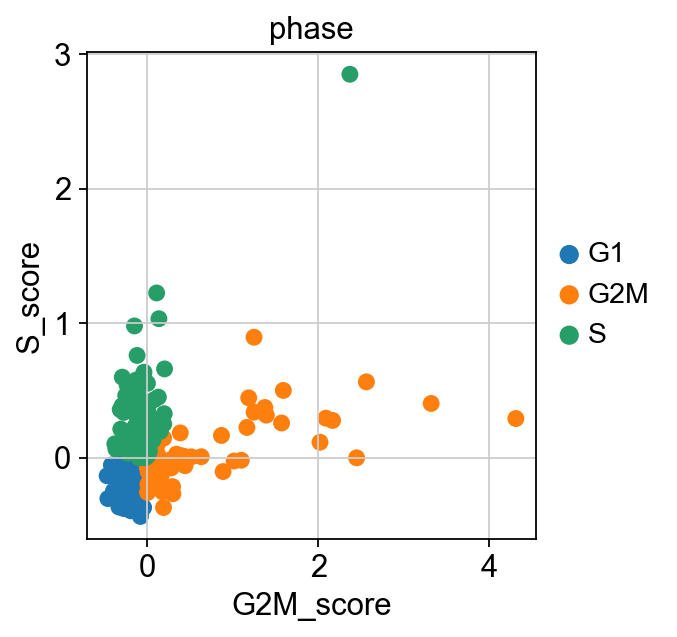

In [58]:
sc.pl.scatter(adata, x='G2M_score', y='S_score', color='phase')

## Feature selection (Highly variable genes)

normalizing counts per cell
    finished (0:00:00)


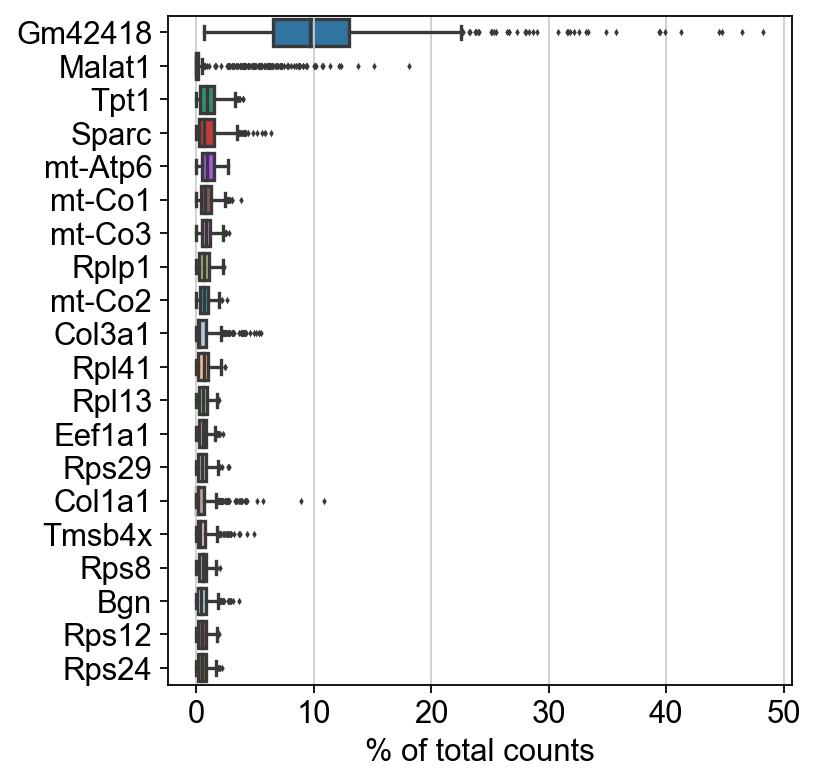

In [59]:
sc.pl.highest_expr_genes(adata, n_top=20) # genes with highest fraction of counts in each single cells across all cells

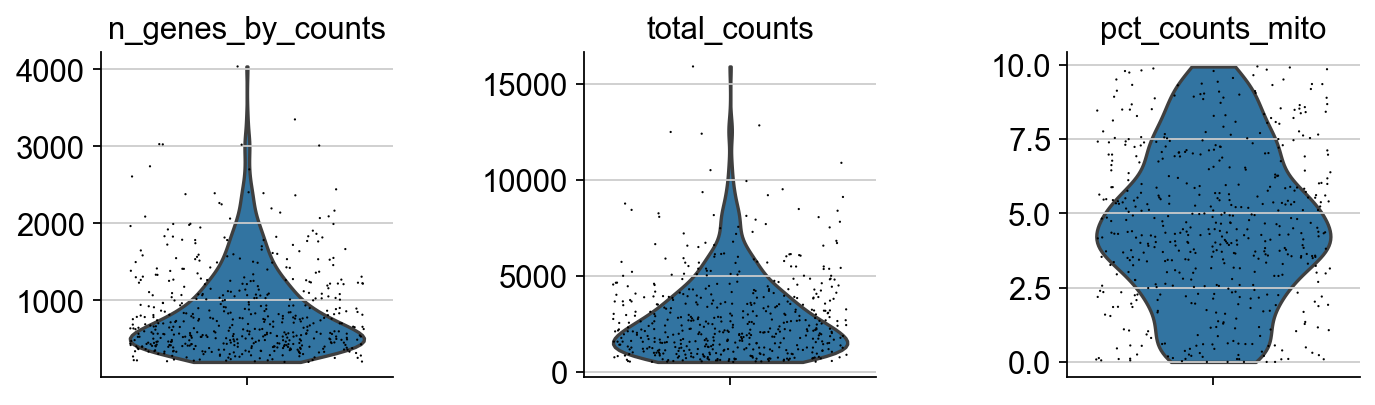

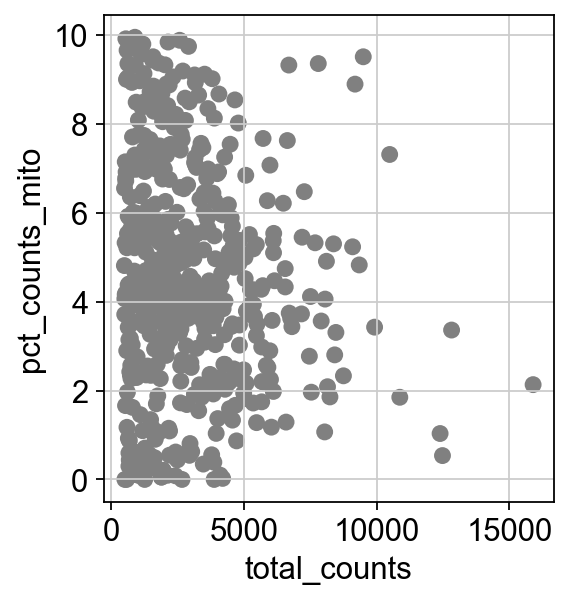

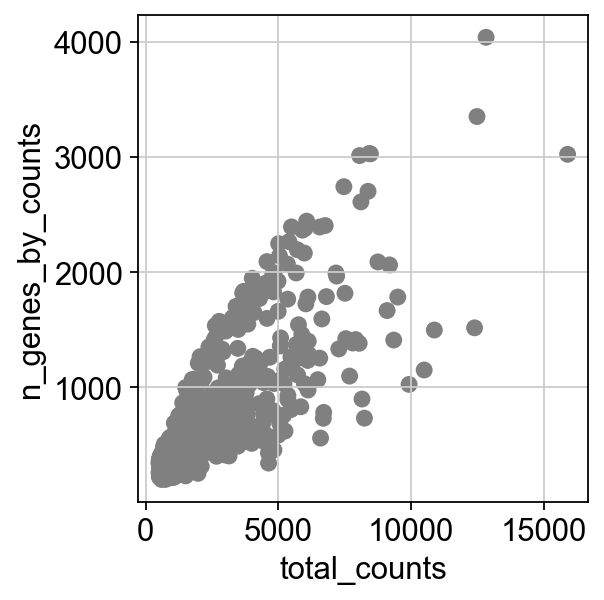

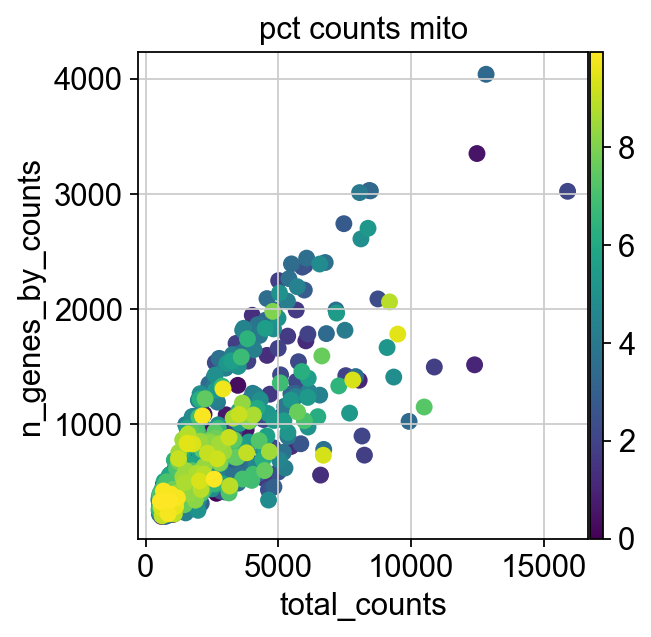

In [60]:
adata.var["mito"] = adata.var_names.str.startswith("mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=['mito'], inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mito'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mito')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='pct_counts_mito')

In [61]:
len(adata[adata.obs['pct_counts_mito'] > 10, :])

0

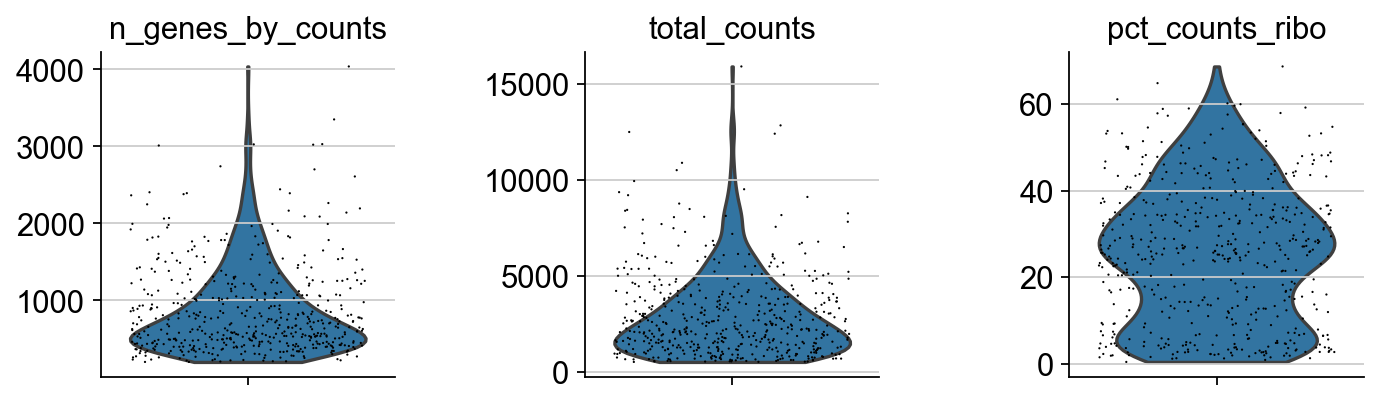

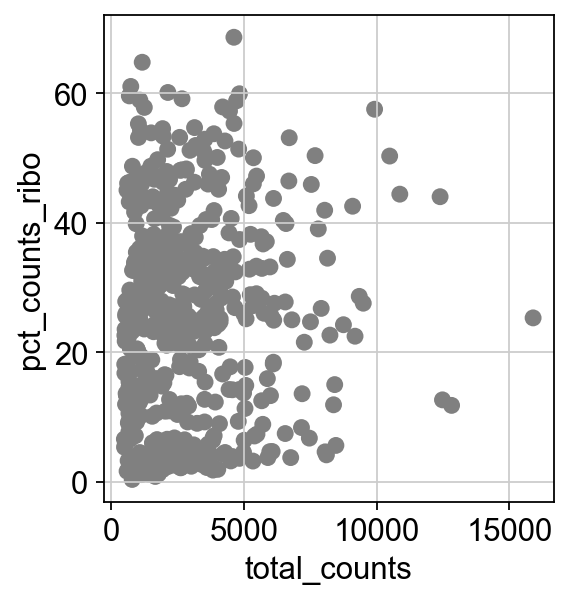

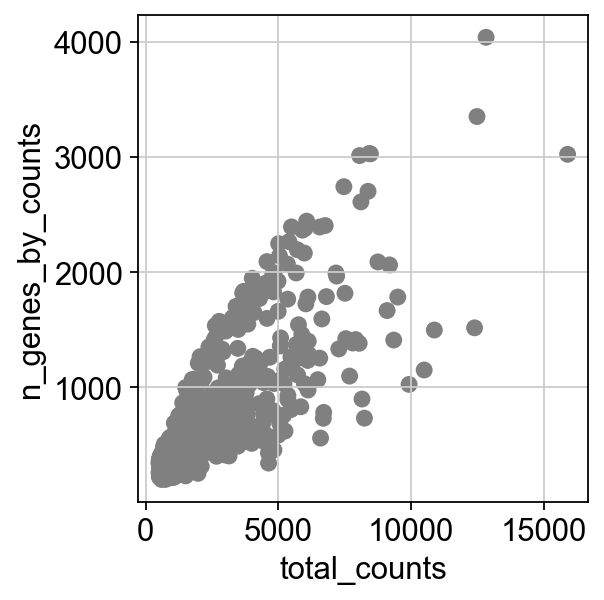

In [62]:
adata.var["ribo"] = ((adata.var_names.str.startswith("Rpl")) | (adata.var_names.str.startswith("Rps")) | (adata.var_names.str.startswith("Mrp")))
sc.pp.calculate_qc_metrics(adata, qc_vars=['ribo'], inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_ribo'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [63]:
adata.obs['log_total_counts'] = np.log10(adata.obs['total_counts'])
adata.obs['log_pct_counts_ribo'] = np.log10(adata.obs['pct_counts_ribo'])
adata.obs['log_pct_counts_mito'] = np.log10(adata.obs['pct_counts_mito'])

In [64]:
#adataRaw=sc.pp.normalize_per_cell(adata, copy=True) 
#sc.pp.log1p(adataRaw)
#sc.pp.scale(adataRaw)  
#adata.raw=adataRaw

#####################################################

#adata.raw=sc.pp.log1p(adata, copy=True)

#####################################################

BoolNotRibo = np.invert(adata.var.ribo)
BoolNotMito = np.invert(adata.var.mito)
BoolRelGenes = BoolNotRibo&BoolNotMito
adata_det = adata[:,BoolRelGenes].copy()

adata.raw = sc.pp.log1p(adata_det,copy=True)

In [65]:
sc.pp.filter_genes(adata, min_counts=20)  # min_counts_u=10

sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

filtered out 23977 genes that are detected in less than 20 counts
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [66]:
adata.X[1:50,1:50].todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.6456427 ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.43265495, 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32)

In [67]:
sc.pp.highly_variable_genes(adata, n_top_genes=4000)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

 Number of highly variable genes: 4000


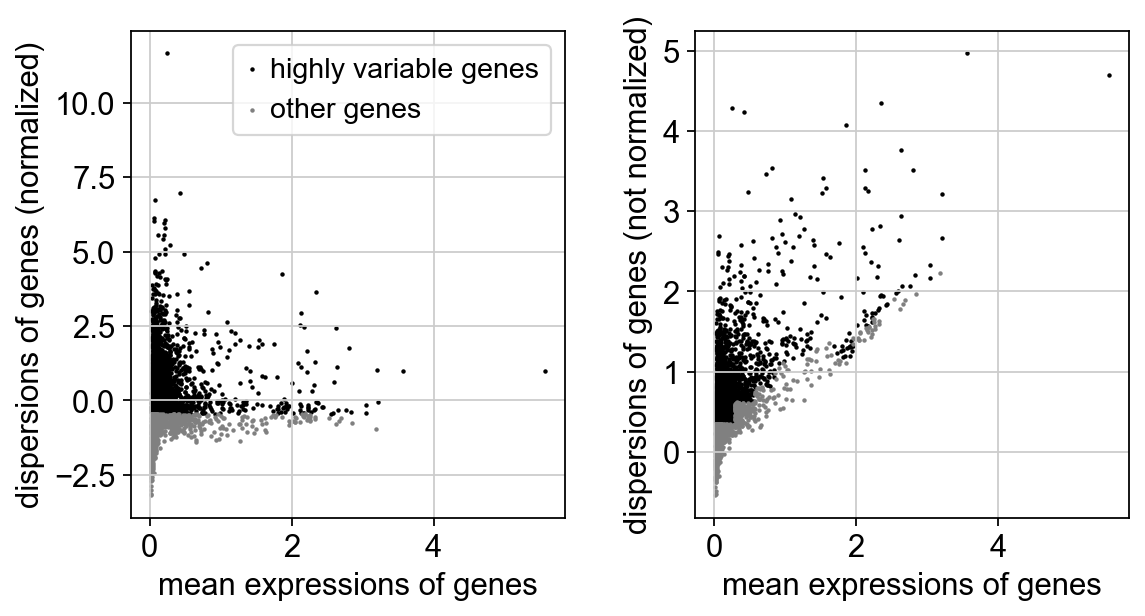

In [68]:
sc.pl.highly_variable_genes(adata, log=False) #,log=True

In [69]:
np.shape(adata)

(519, 5859)

## Clustering and dimensional reduction

In [70]:
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


## PCA

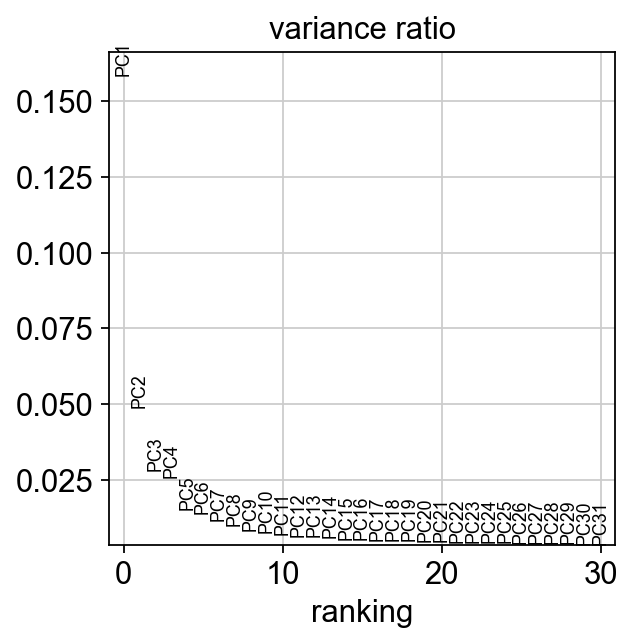

In [71]:
sc.pl.pca_variance_ratio(adata)

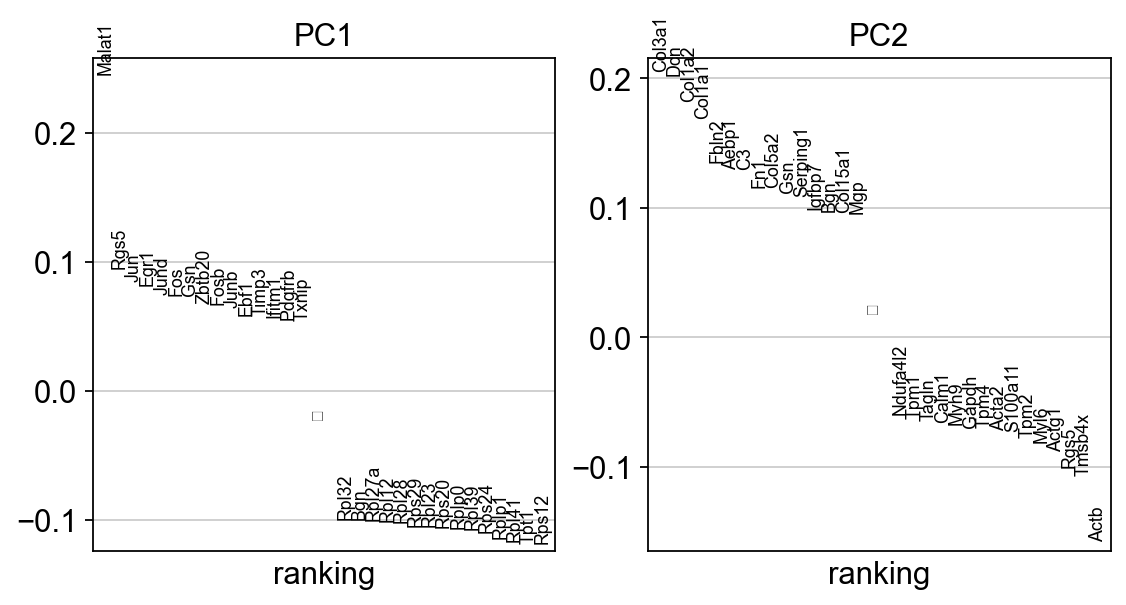

In [72]:
sc.pl.pca_loadings(adata, components=[1,2])

In [73]:
sc.settings.set_figure_params(dpi=120, dpi_save=300, vector_friendly=True, transparent=True, color_map='viridis')

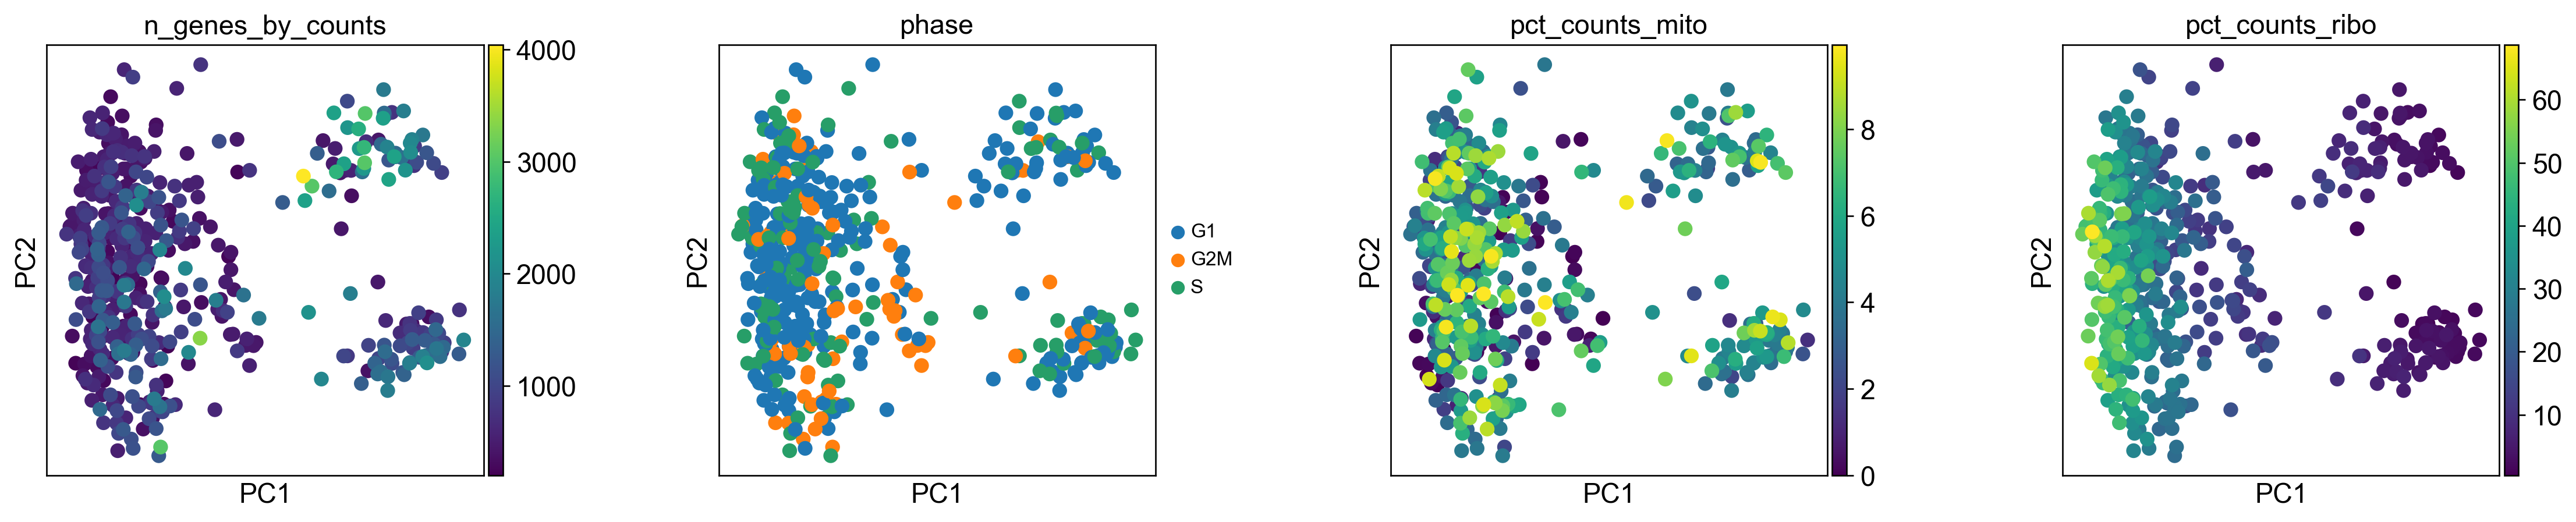

In [74]:
sc.pl.pca(adata, color=['n_genes_by_counts','phase','pct_counts_mito','pct_counts_ribo'], legend_loc='right margin', legend_fontsize=10, wspace=0.4) 

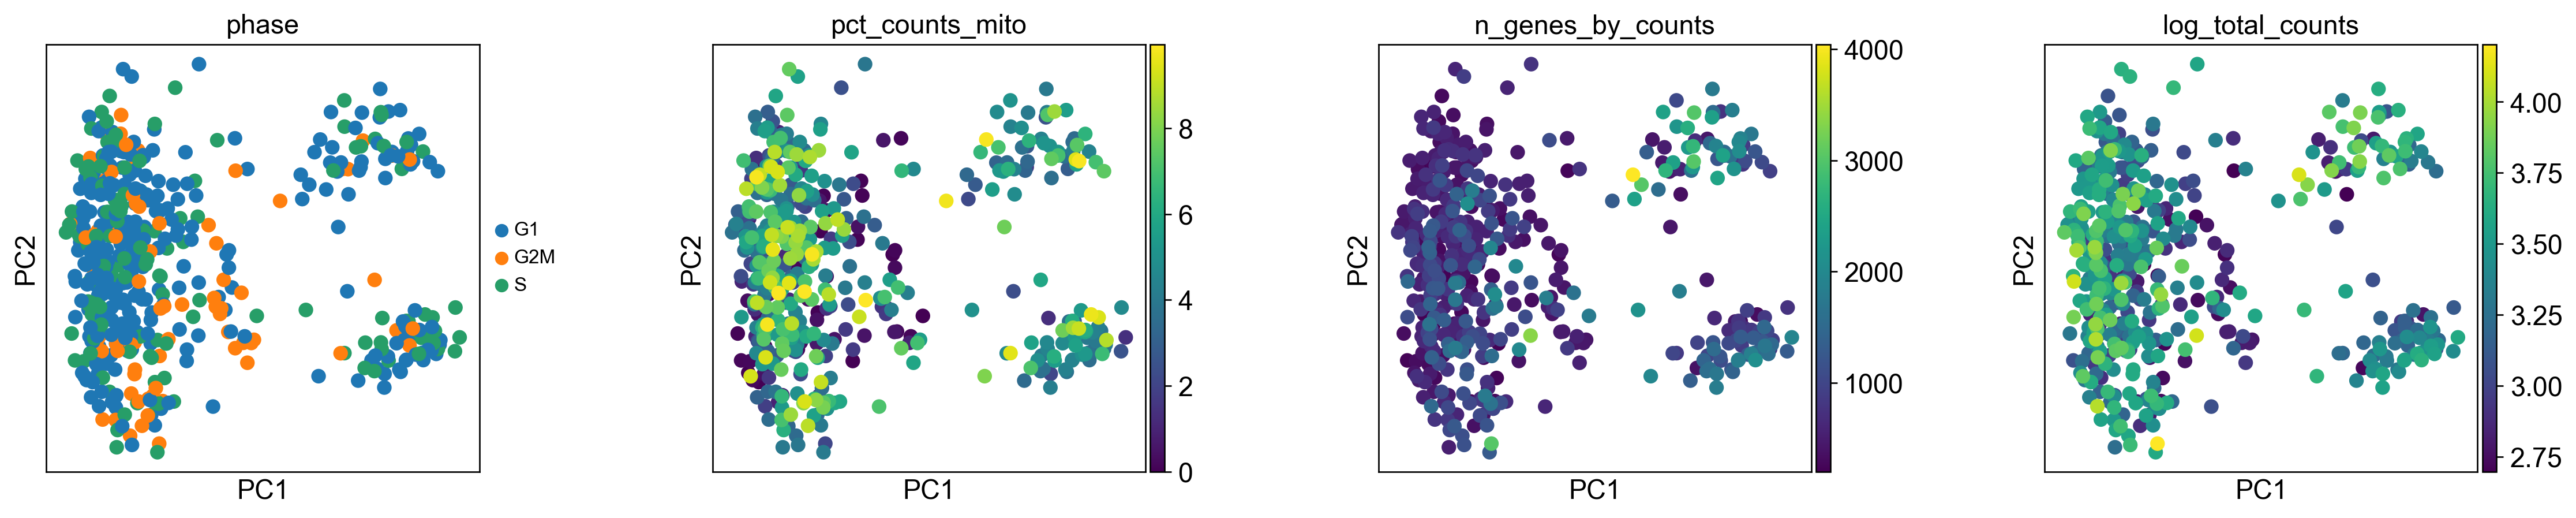

In [75]:
sc.pl.pca(adata, color=['phase','pct_counts_mito','n_genes_by_counts','log_total_counts'], legend_loc='right margin', legend_fontsize=10, wspace=0.4) 

## Neighbours and batch corrections

In [76]:
adata.obs['samples2'] = adata.obs['batch'].cat.add_categories(['8661_ctrl','8661_T/N','8661_T/N+aPDL1','9091_ctrl','9091_T/N','9091_T/N+aPDL1'])

adata.obs['samples2'][np.in1d(adata.obs['samples2'], ["a.8661 ctrl", "b.8661 ctrl"])] = '8661_ctrl'
adata.obs['samples2'][np.in1d(adata.obs['samples2'], ["a.8661 T/N", "b.8661 T/N"])] = '8661_T/N'
adata.obs['samples2'][np.in1d(adata.obs['samples2'], ["a.8661 T/N+aPDL1", "b.8661 T/N+aPDL1"])] = '8661_T/N+aPDL1'
adata.obs['samples2'][np.in1d(adata.obs['samples2'], ["a.9091 ctrl", "b.9091 ctrl"])] = '9091_ctrl'
adata.obs['samples2'][np.in1d(adata.obs['samples2'], ["a.9091 T/N", "b.9091 T/N"])] = '9091_T/N'
adata.obs['samples2'][np.in1d(adata.obs['samples2'], ["a.9091 T/N+aPDL1_1","a.9091 T/N+aPDL1_2", "b.9091 T/N+aPDL1_1", "b.9091 T/N+aPDL1_2"])] = '9091_T/N+aPDL1'

adata.obs['samples2'] = adata.obs['samples2'].cat.remove_unused_categories()

In [77]:
n_PCs=30

batch balanced k nearest neighbours

In [78]:
bbknn.bbknn(adata, batch_key='samples2', neighbors_within_batch=15, n_pcs=30) # batch correction

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [ ]:
#sc.pp.neighbors(adata, n_pcs=10, n_neighbors=30) # no batch correction

### Leiden clustering

In [79]:
sc.tl.leiden(adata, resolution=0.5) 

running Leiden clustering
    finished: found 4 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


## UMAP

In [80]:
adata.shape

(519, 5859)

In [81]:
adata

AnnData object with n_obs × n_vars = 519 × 5859
    obs: 'batch', 'batch_key', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'phase', 'S_score', 'G2M_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'log_total_counts', 'log_pct_counts_ribo', 'log_pct_counts_mito', 'samples2', 'leiden'
    var: 'feature_types', 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'gene_ids-12', 'gene_ids-13', 'gene_ids-2', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'ribo', 'n_counts', 'highly_variable', 'means', 'dispers

In [82]:
sc.tl.umap(adata) # n_components=3 

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


In [83]:
sc.tl.leiden(adata, resolution=1.0) 

running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


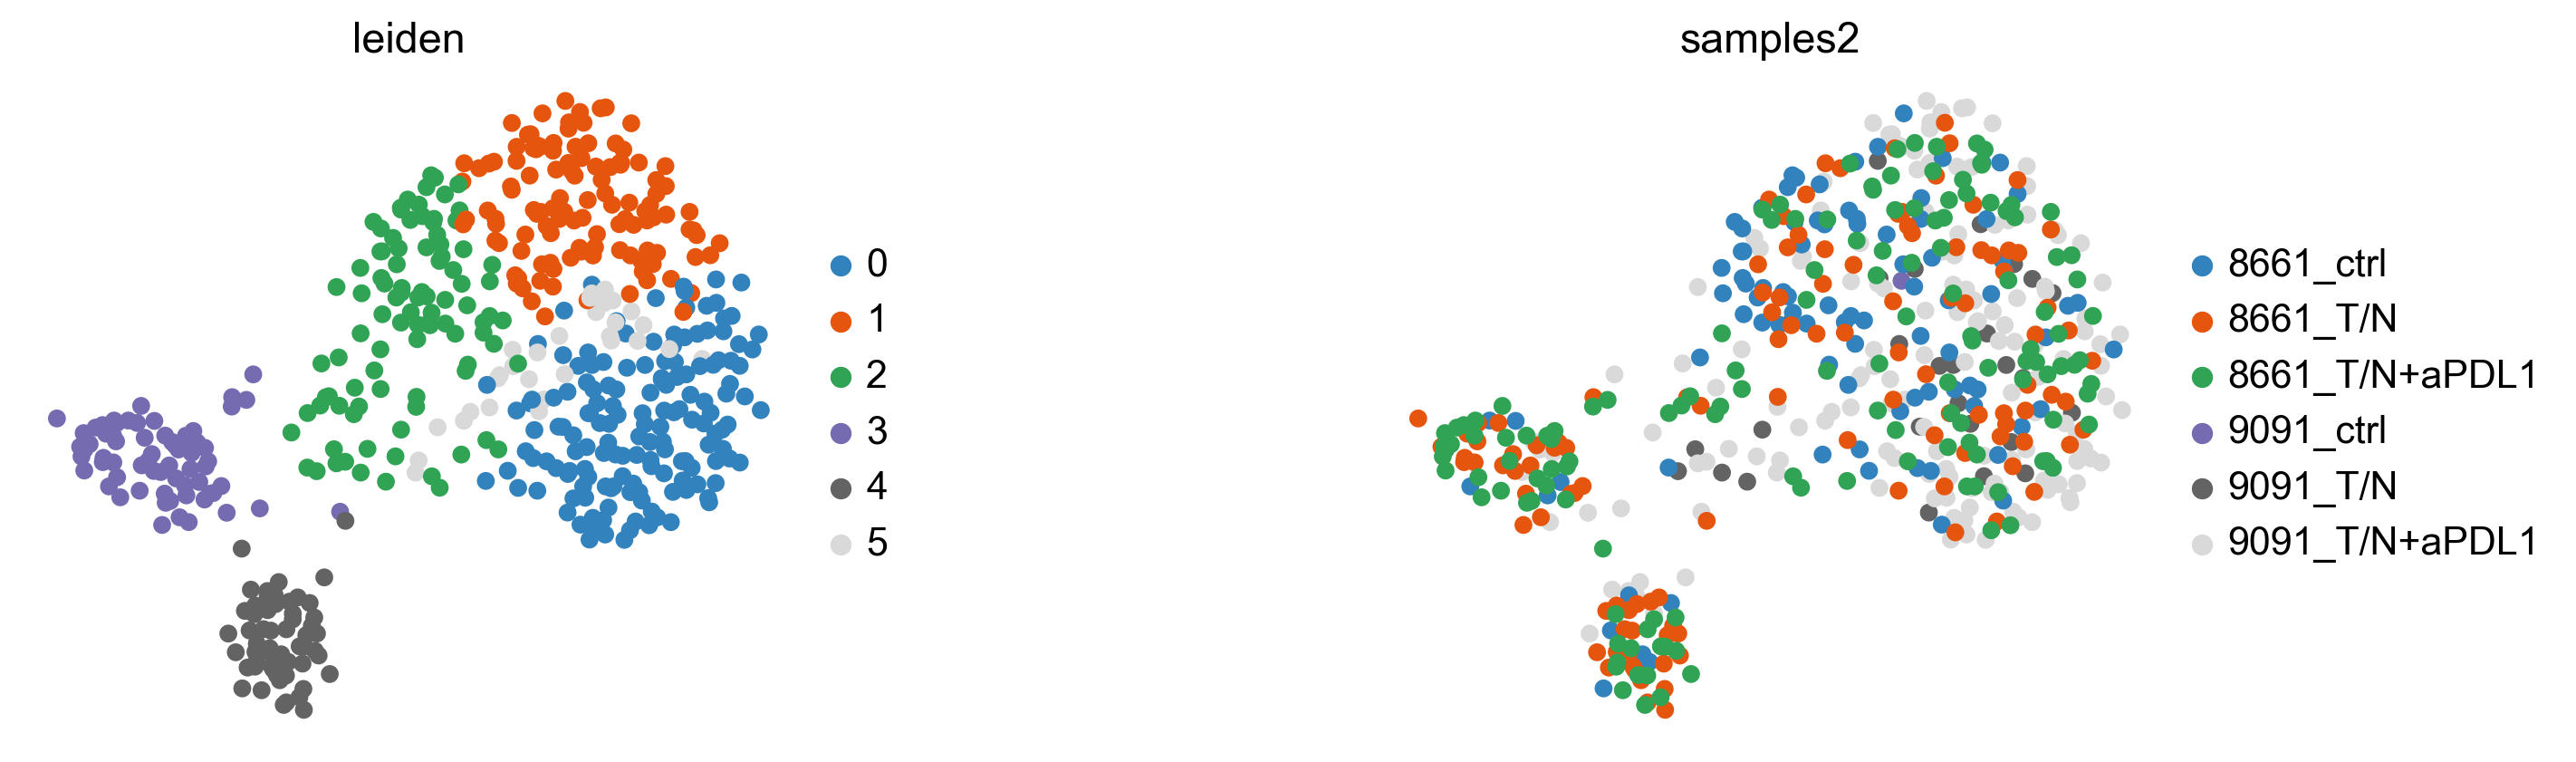

In [87]:
sc.pl.umap(adata, color=['leiden','samples2'], size=140, wspace=0.6, palette='tab20c', frameon=False)

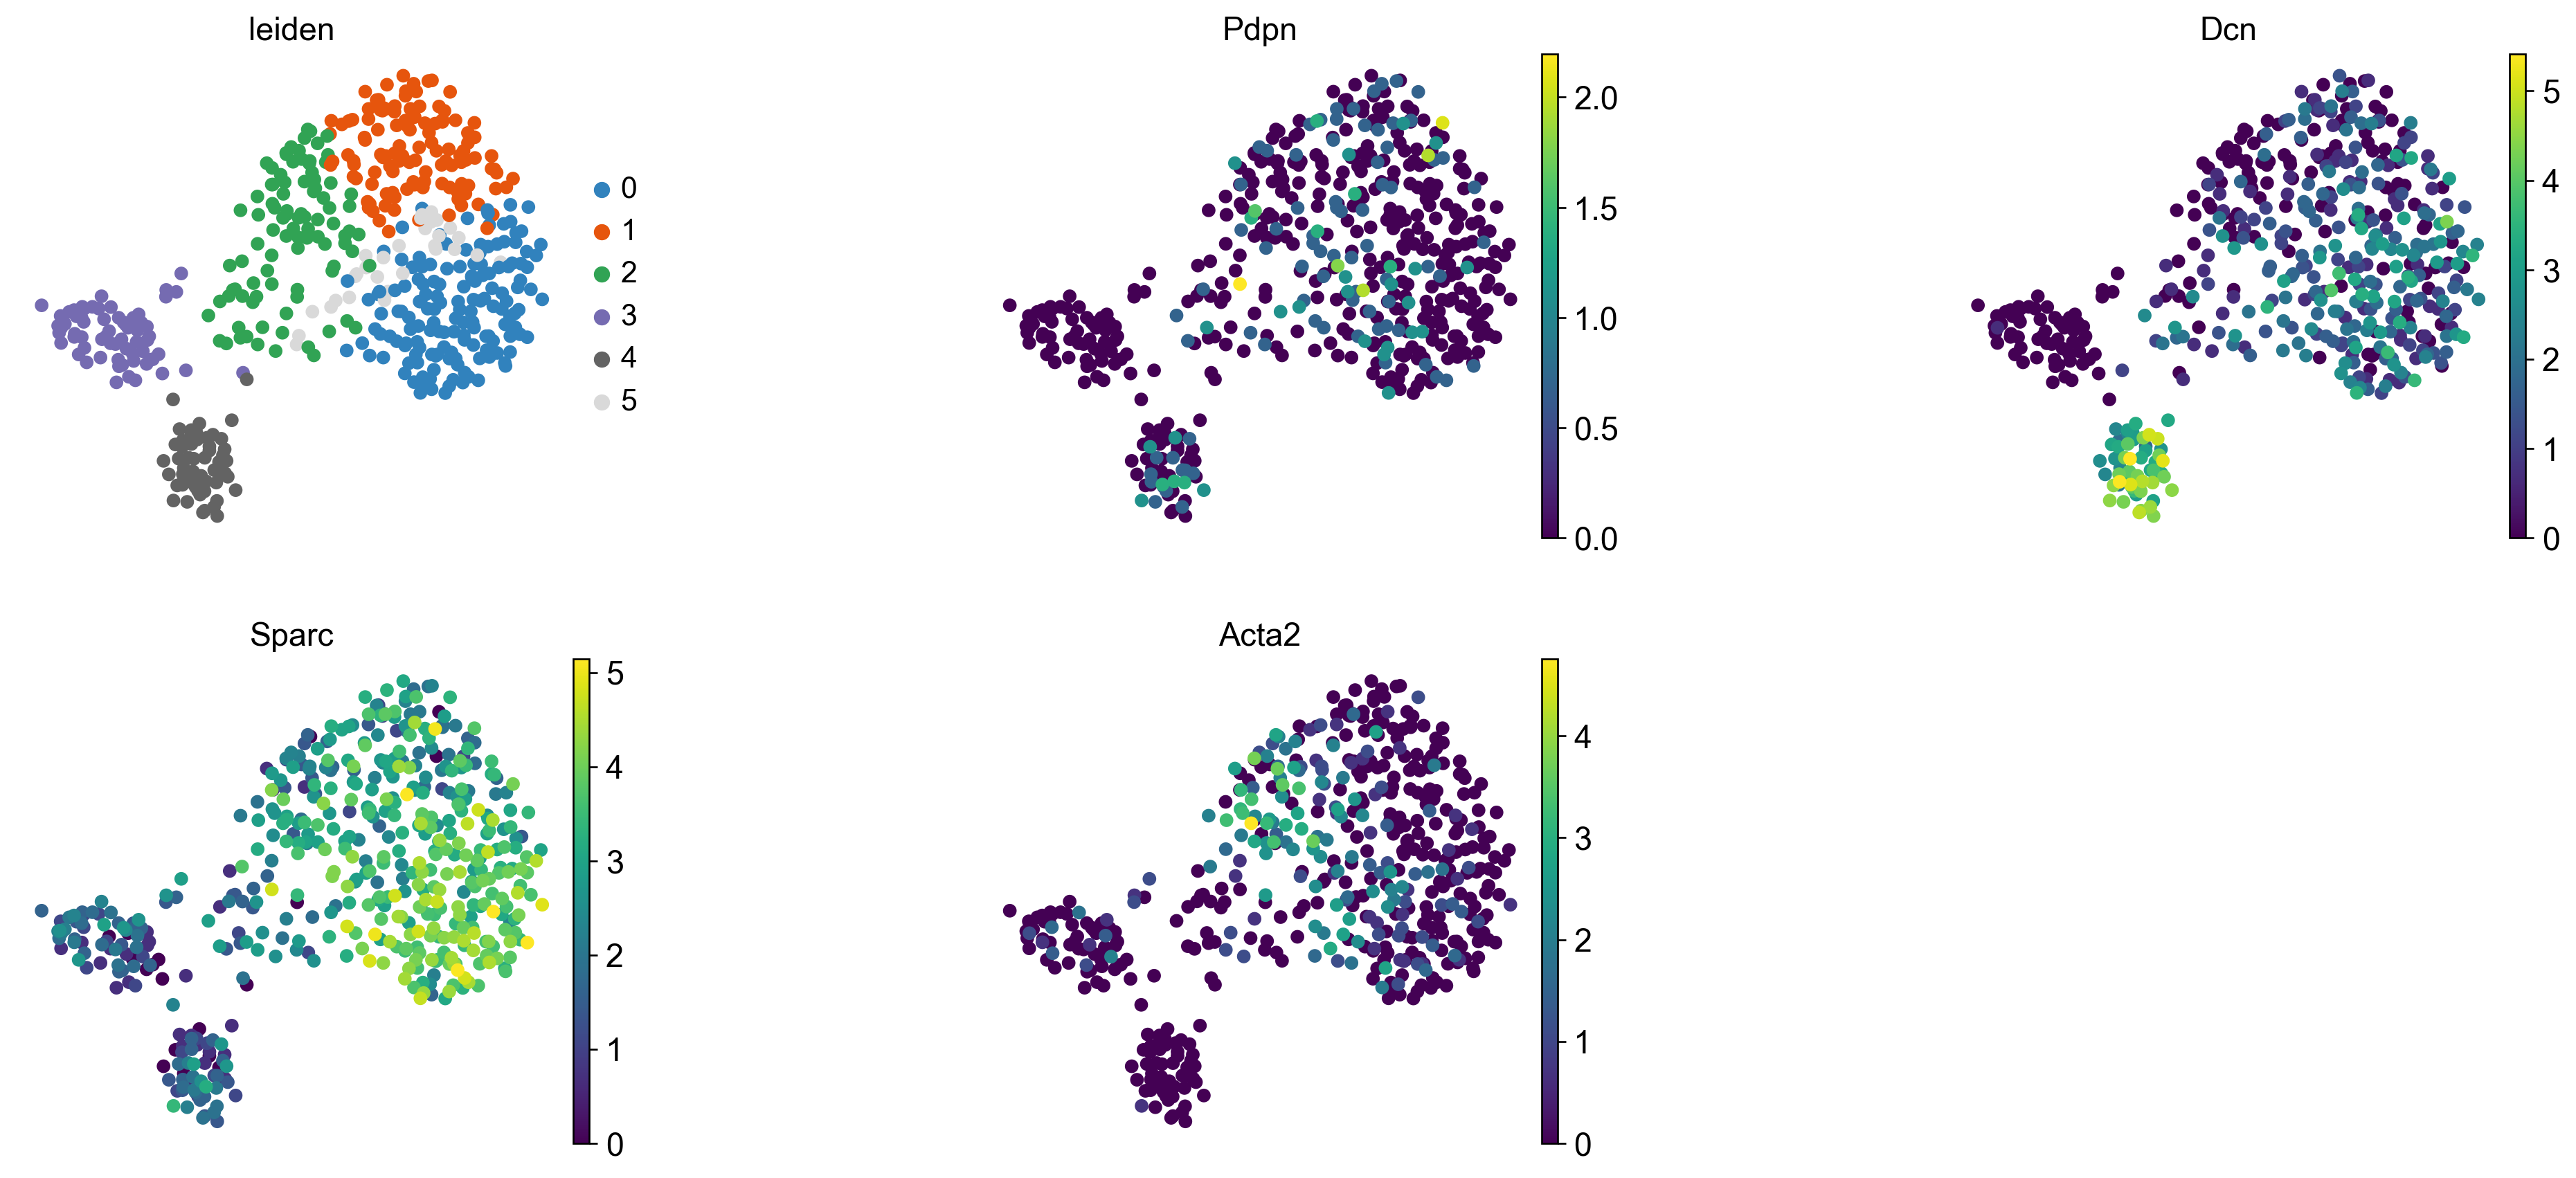

In [89]:
sc.pl.umap(adata, color=['leiden','Pdpn','Dcn','Sparc','Acta2'], size=140, wspace=0.6, palette='tab20c', ncols=3, frameon=False)

In [90]:
adata.obs['samples'] = adata.obs['batch'].cat.add_categories(['classical','mesenchymal'])

adata.obs['samples'][np.in1d(adata.obs['samples'], ["a.8661 ctrl", "a.8661 T/N", "a.8661 T/N+aPDL1", "b.8661 ctrl", "b.8661 T/N", "b.8661 T/N+aPDL1"])] = 'classical'
adata.obs['samples'][np.in1d(adata.obs['samples'], ["a.9091 ctrl", "a.9091 T/N", "a.9091 T/N+aPDL1_1","a.9091 T/N+aPDL1_2", "b.9091 ctrl", 
                       "b.9091 T/N", "b.9091 T/N+aPDL1_1", "b.9091 T/N+aPDL1_2"])] = 'mesenchymal'



adata.obs['samples'] = adata.obs['samples'].cat.remove_unused_categories()

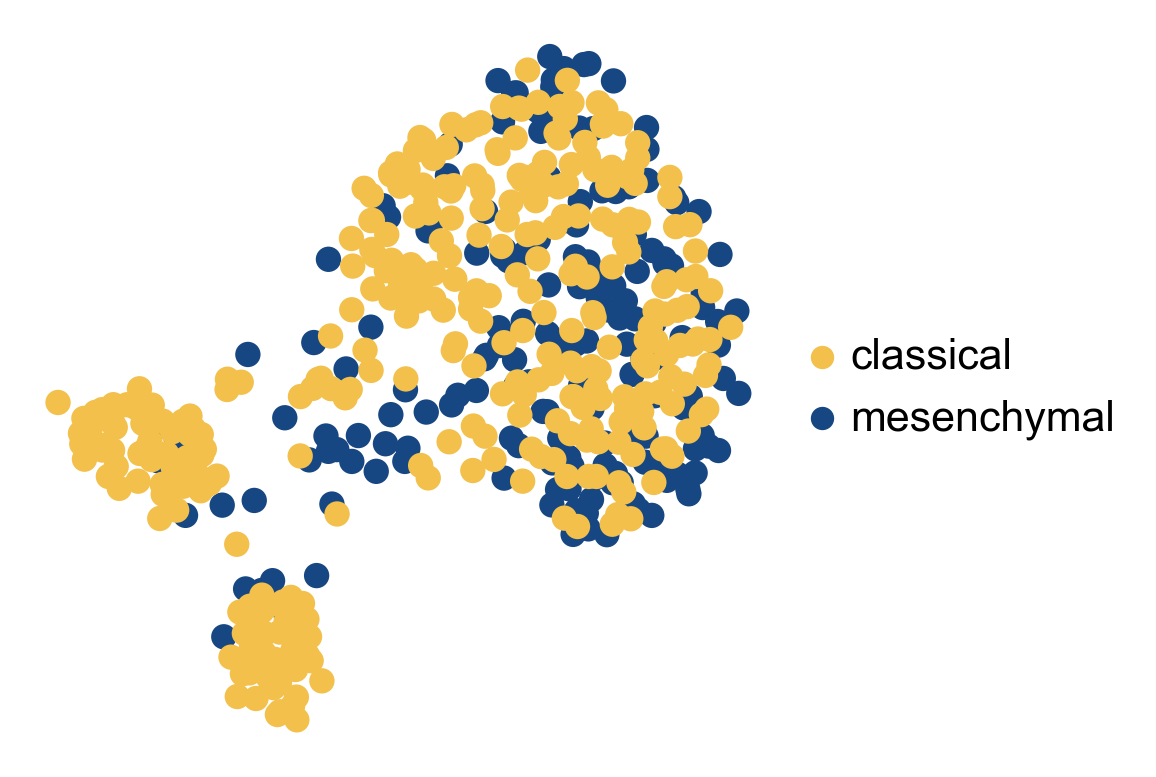

In [91]:
sc.pl.umap(adata, color='samples', title='', palette=['#f2c04b','#174782'], frameon=False)

In [93]:
adata_8661_fibro = adata[~adata.obs['batch'].isin(["a.9091 T/N","b.9091 T/N","a.9091 ctrl","b.9091 ctrl",
                                                  "a.9091 T/N+aPDL1_1","a.9091 T/N+aPDL1_2", "b.9091 T/N+aPDL1_2", "b.9091 T/N+aPDL1_1"]),:].copy()

In [94]:
sc.tl.embedding_density(adata_8661_fibro, groupby='samples2')

computing density on 'umap'
--> added
    'umap_density_samples2', densities (adata.obs)
    'umap_density_samples2_params', parameter (adata.uns)


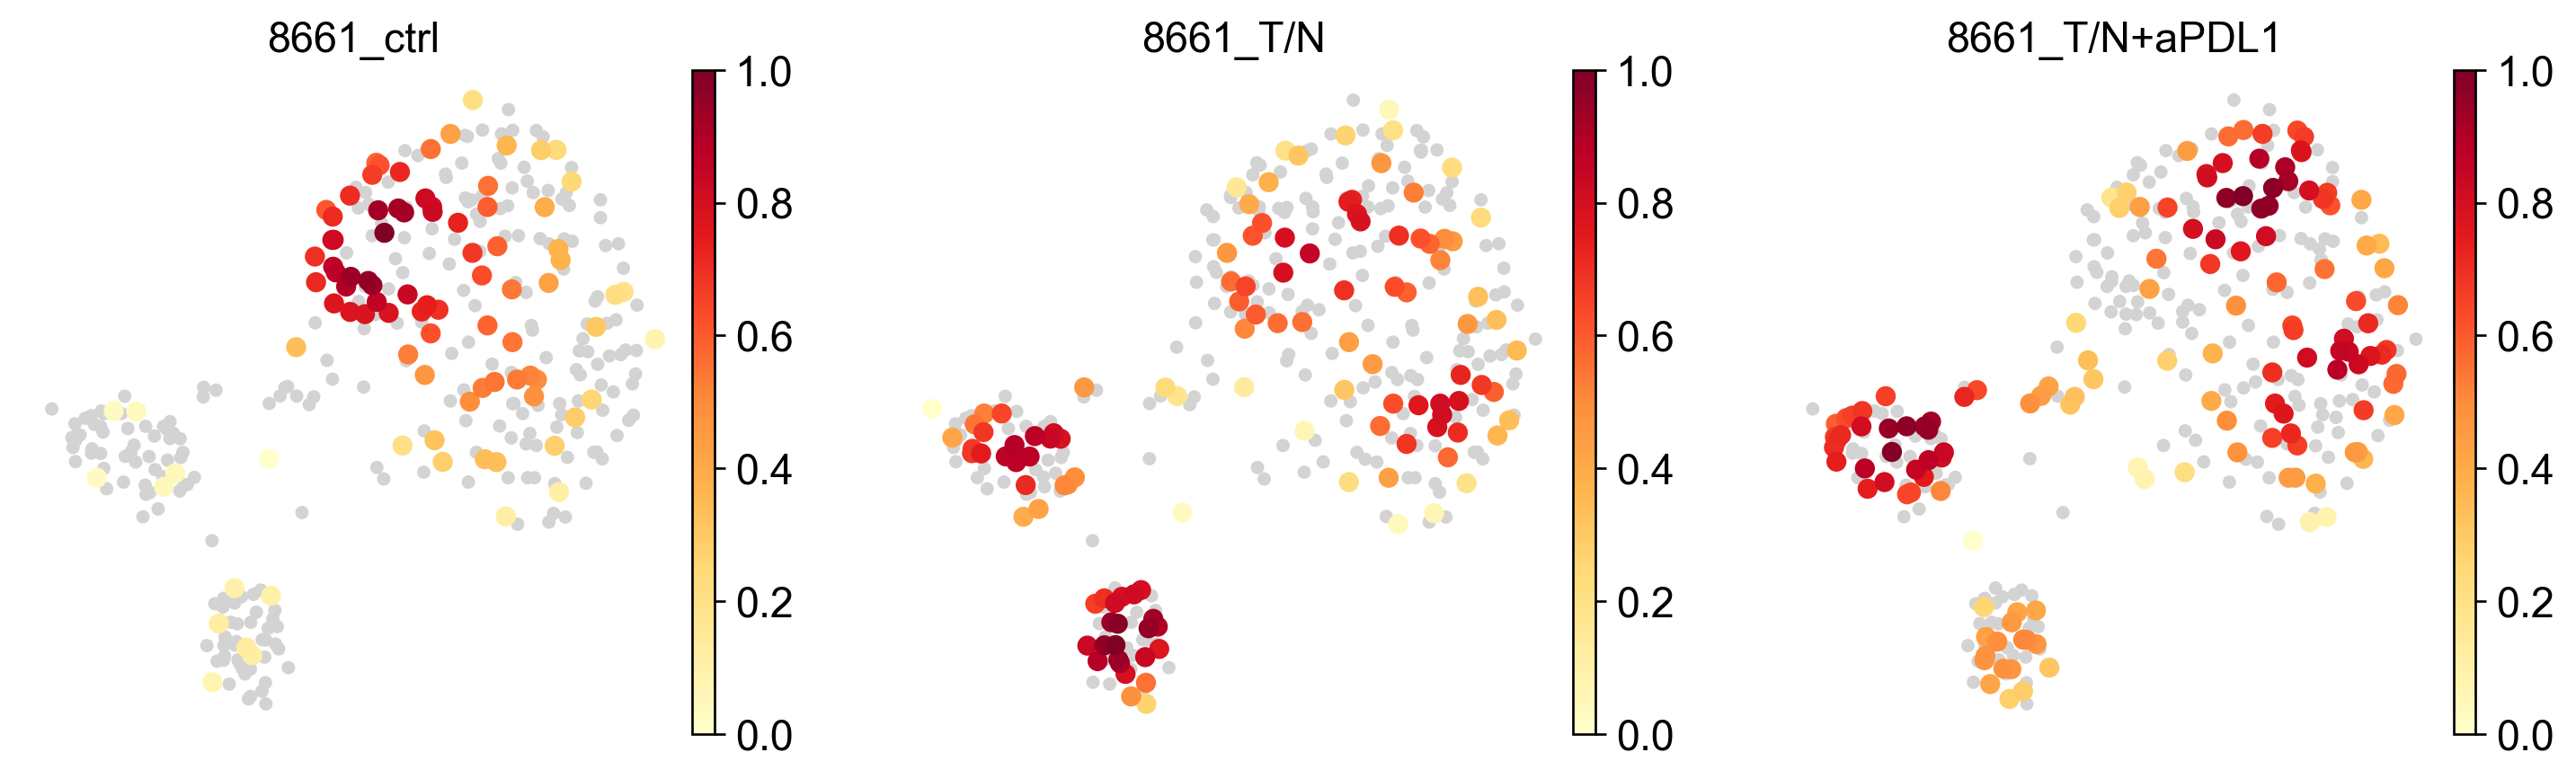

In [95]:
sc.pl.embedding_density(adata_8661_fibro, groupby='samples2', frameon=False)

## save .h5ad file

In [96]:
import scipy.sparse as sparse

In [97]:
adata.X = sparse.csr_matrix(adata.X)

In [107]:
adata_8661_fibro.write(data_dir + 'Overlay_treatment_preprocessing_fibroblasts_8661_fibro_bbknn_V01-sb.h5ad')